<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

# 1. Import libraries, classes, custom functions and data load</h1>

In [1]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, regexp_tokenize
from nltk.util import ngrams
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, MWETokenizer, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

import spacy
import utility_func as utils
from wordcloud import WordCloud
from langdetect import detect_langs
from gensim.models import Word2Vec
import xgboost as xgb
from langdetect import detect_langs
from tabulate import tabulate

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

# 2. Data Understanding

## 2.1 Data Source and Description

In [2]:
############## Or go to Section 3 (DP - Data Preparation) to load a CSV file specifically created for the Recommendation System ##############
reviews = LoadReviews()
utils.YelpDatasets_Reviews(reviews_df = reviews)


Reviews DataFrame's head:


review_id                 user_id             business_id  \
2    saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
14   UBp0zWyH60Hmw6Fsasei7w  4Uh27DgGzsp6PqrH913giQ  otQS34_MymijPTdNBoBdCw   
75   ymhbOMW63B_vGaRFR3XT0A  yZdAhQ_KmKuCZmbBy9YDQg  5Ce3lZksYVkCbrihqylVHQ   
93   onlgwy5qGDEzddsrnIvtWg  pYXeL0RCqus2IfhthYCOyA  W7NxQw8UYFR0HLPrI08tvw   
147  ypFqmURIY41F4pWaMW1VrQ  hToW2eoTAYlOcuNz7I73Cg  7L1kXfwU5XM6f6Jxo_L7Yg   

     stars  useful  funny  cool  \
2        3       0      0     0   
14       4       0      2     0   
75       5       0      0     0   
93       4       0      0     0   
147      5       1      0     0   

                                                  text                date  
2    Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
14   The bun makes the Sonoran Dog. It's like a snu... 2011-10-27 17:12:05  
75   I just started going to Sushi Nara this month ... 2014-07-25 17:56:26  
93   Don't know what it is but If my tummy's feelin... 2012-02-01 14:21:25  
147  We've been coming here since I was a kid. The ... 2015-07-03 22:36:04

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341468 entries, 2 to 6990242
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    341468 non-null  object        
 1   user_id      341468 non-null  object        
 2   business_id  341468 non-null  object        
 3   stars        341468 non-null  int64         
 4   useful       341468 non-null  int64         
 5   funny        341468 non-null  int64         
 6   cool         341468 non-null  int64         
 7   text         341468 non-null  object        
 8   date         341468 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 26.1+ MB


In [4]:
reviews.describe()

stars         useful          funny           cool
count  341468.000000  341468.000000  341468.000000  341468.000000
mean        3.720899       1.260833       0.302851       0.416575
std         1.542284       2.751193       1.170174       1.523648
min         1.000000       0.000000       0.000000       0.000000
25%         2.000000       0.000000       0.000000       0.000000
50%         4.000000       0.000000       0.000000       0.000000
75%         5.000000       2.000000       0.000000       0.000000
max         5.000000     236.000000      72.000000     130.000000

## 2.2 Exploratory Data Analysis

In [5]:
reviews = reviews.sample(n=7500, random_state=42)
display(reviews)
reviews.describe()

review_id                 user_id  \
3072330  0MFy30StA0Ns8ILccsowyA  S-cMvM-TbIg1oYMLPneoBg   
3716689  LWER5lk9yGVoKr36yYxKsQ  RIXIoCTafjr1auUJkV3fLg   
6289074  pIdyWcCclKeplPN8D4Ft2A  a2DGFEIov1L7X9rKdVmN6A   
3245132  hWhJGNQEZRXWiBDp2XR2sw  DT0Elf41cptTnuz16auxKQ   
442448   fOKCRjS5DMGj4uCKvkcNUA  7F7Z-PCZjfxie15f9vl8ww   
...                         ...                     ...   
2909485  K_UBWJPpoi74hw1aFAYfXg  ibmN-obUhqk2hUvGhP5rmg   
6896440  fSaK80BBSJvA4oRHny4bOA  W9kZgeqUS24aVjpAHNGTvg   
2008655  KscyQIp43XKl-S1Xt6tR7Q  qhExDnHCD8fWowtAVPoT0w   
3986147  o87VxUmF7IMkwYlcqR7dbw  me8Z5B0dr8nwZwtjGBDL9g   
3391459  xgzmfvh3nUu1X2Drq0FliQ  KHOEeBORWu62w5z3yZqGPA   

                    business_id  stars  useful  funny  cool  \
3072330  43MDfrU28FYjfpamNfL9GA      4       2      0     0   
3716689  r6Unwg-mxv_3JrEjQ24_TQ      4       0      0     0   
6289074  xuYPogbBSHAtOebONVhprA      5       3      0     3   
3245132  lC0_e8F1zAstzhj-O3eQZg      5       0      0     0   
442448   8QJTzIaR5FceGds8HBSIig      5       0      0     0   
...                         ...    ...     ...    ...   ...   
2909485  pUeuBWxgll2in2KqKeAR_A      1       0      0     0   
6896440  fEK-43XEHJXn18b9HC3m0w      5       1      0     1   
2008655  H-hmY9T6Wv2vV3OTW9Apsg      1       0      0     0   
3986147  q493DBsbxwrdo_dexLmSIA      1       0      0     0   
3391459  WP_AgvpNGROc8qoMeXuaCg      5       0      0     0   

                                                      text                date  
3072330  Great food and environment. Loved the wine.\n\... 2013-11-30 22:31:33  
3716689  This Costco has very helpful staff and is alwa... 2014-06-06 23:02:11  
6289074  We have been coming here our whole lives and w... 2021-06-23 02:54:36  
3245132  This place is a must when you come Tucson! I'm... 2020-01-23 20:10:01  
442448   We loved our visit at Barrio today. They had a... 2017-09-17 22:39:09  
...                                                    ...                 ...  
2909485  I'm so very disappointed in this what is suppo... 2016-08-08 11:41:05  
6896440  Dr Chen is a Mohs Surgeon. A surgeon that remo... 2021-12-28 15:51:09  
2008655  The technician that was assigned to me for my ... 2021-09-14 17:44:39  
3986147  Absolutely horrible! My wife and I bought two ... 2020-12-06 16:18:11  
3391459  We hired team hustle for a move in around mid ... 2020-11-30 23:45:02  

[7500 rows x 9 columns]

stars       useful        funny         cool
count  7500.000000  7500.000000  7500.000000  7500.000000
mean      3.721333     1.318800     0.302800     0.411067
std       1.541426     4.021193     1.302256     1.433957
min       1.000000     0.000000     0.000000     0.000000
25%       2.000000     0.000000     0.000000     0.000000
50%       4.000000     0.000000     0.000000     0.000000
75%       5.000000     2.000000     0.000000     0.000000
max       5.000000   236.000000    32.000000    65.000000

### 2.2.1 Distribution of reviews and stars

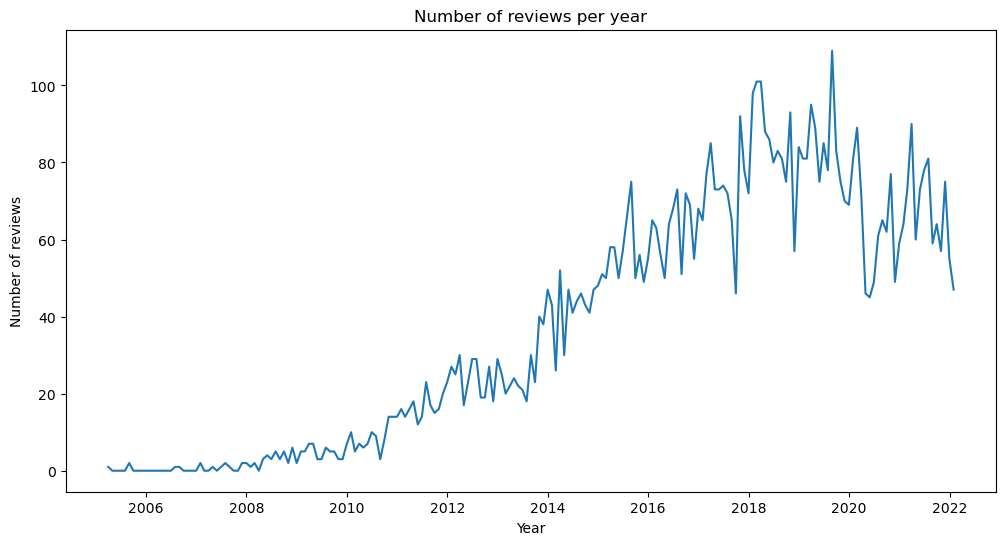

In [6]:
reviews['date'] = pd.to_datetime(reviews['date'])
df = reviews.set_index('date')

# Set the background to white
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'white' # Set background to white

# Create the line graph
plt.plot(df['text'].resample('M').count())

# Remove the grids
plt.grid(False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per year')

# Show the graph
plt.show()

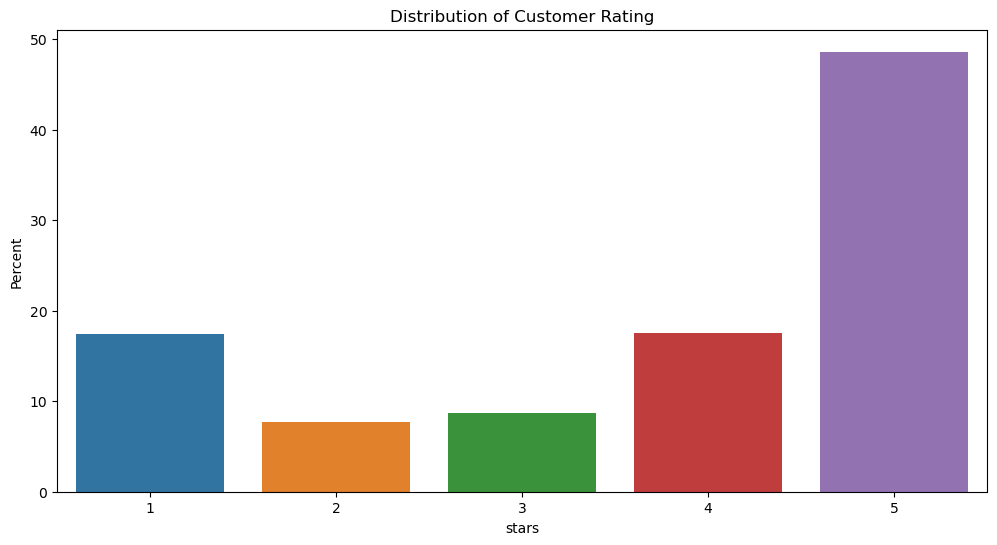

In [7]:
# Set the background to white
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'white' # Set background to white

# Create the bar chart
ax = sns.barplot(data=reviews, x='stars', y='stars', estimator=lambda x: len(x) / len(reviews) * 100)

# Remove the grids
ax.grid(False)

# Set the ylabel, title and display the graph
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

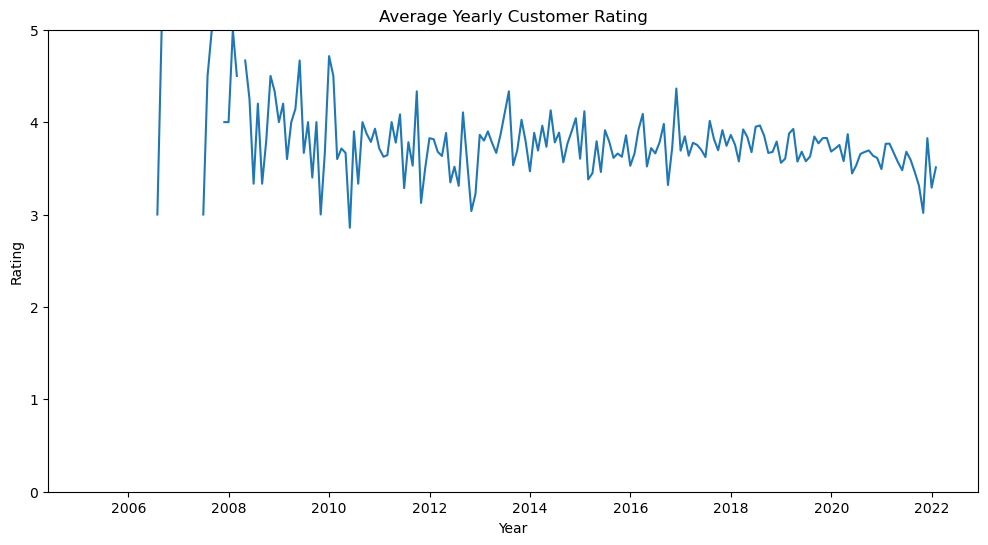

In [8]:
# Set the background to white
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'white' # Set background to white

# Create the line graph
plt.plot(df['stars'].resample('M').mean())

# Remove the grids
plt.grid(False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Yearly Customer Rating')
plt.ylim(0, 5)

# Show the graph
plt.show()

 ### 2.2.2 Text Length

#### 2.2.2.1 To get an insight on the length of each review, we can create a new column in yelp called text length. This column will store the number of characters in each review.

In [9]:
reviews['text length'] = reviews['text'].apply(len)
reviews.head()

review_id                 user_id  \
3072330  0MFy30StA0Ns8ILccsowyA  S-cMvM-TbIg1oYMLPneoBg   
3716689  LWER5lk9yGVoKr36yYxKsQ  RIXIoCTafjr1auUJkV3fLg   
6289074  pIdyWcCclKeplPN8D4Ft2A  a2DGFEIov1L7X9rKdVmN6A   
3245132  hWhJGNQEZRXWiBDp2XR2sw  DT0Elf41cptTnuz16auxKQ   
442448   fOKCRjS5DMGj4uCKvkcNUA  7F7Z-PCZjfxie15f9vl8ww   

                    business_id  stars  useful  funny  cool  \
3072330  43MDfrU28FYjfpamNfL9GA      4       2      0     0   
3716689  r6Unwg-mxv_3JrEjQ24_TQ      4       0      0     0   
6289074  xuYPogbBSHAtOebONVhprA      5       3      0     3   
3245132  lC0_e8F1zAstzhj-O3eQZg      5       0      0     0   
442448   8QJTzIaR5FceGds8HBSIig      5       0      0     0   

                                                      text  \
3072330  Great food and environment. Loved the wine.\n\...   
3716689  This Costco has very helpful staff and is alwa...   
6289074  We have been coming here our whole lives and w...   
3245132  This place is a must when you come Tucson! I'm...   
442448   We loved our visit at Barrio today. They had a...   

                       date  text length  
3072330 2013-11-30 22:31:33          245  
3716689 2014-06-06 23:02:11          266  
6289074 2021-06-23 02:54:36          423  
3245132 2020-01-23 20:10:01          155  
442448  2017-09-17 22:39:09          176

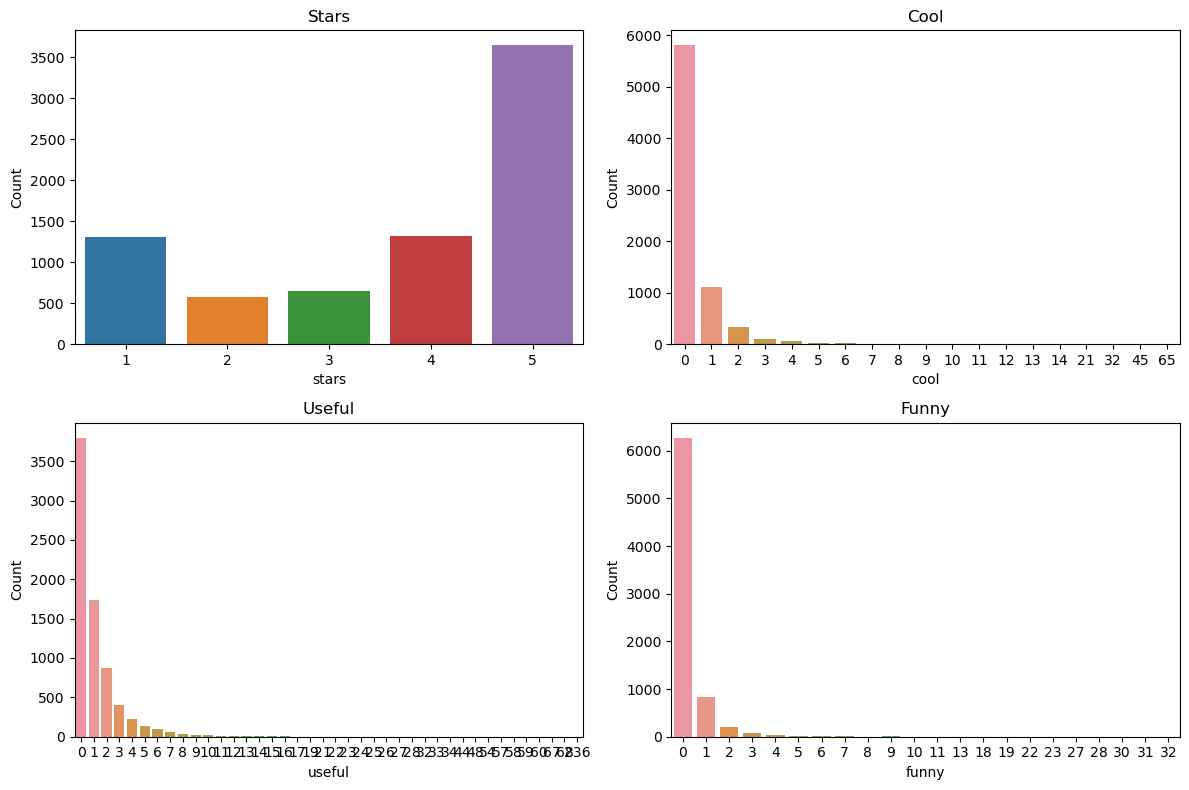

In [10]:
# Set the background as white
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')  # Define o fundo como branco

# Subplot 1
axes1 = plt.subplot(2, 2, 1)
axes1 = sns.countplot(x='stars', data=reviews)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

# Subplot 2
axes2 = plt.subplot(2, 2, 2)
axes2 = sns.countplot(x='cool', data=reviews)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

# Subplot 3
axes3 = plt.subplot(2, 2, 3)
axes3 = sns.countplot(x='useful', data=reviews)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

# Subplot 4
axes4 = plt.subplot(2, 2, 4)
axes4 = sns.countplot(x='funny', data=reviews)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

# Remova all the grids
for ax in [axes1, axes2, axes3, axes4]:
    ax.grid(False)

# Show all the plots
plt.show()

#### 2.2.2.2 Seaborn’s FacetGrid allows us to create a grid of histograms placed side by side. We can use FacetGrid to see if there’s any relationship between our newly created text length feature and the stars rating.

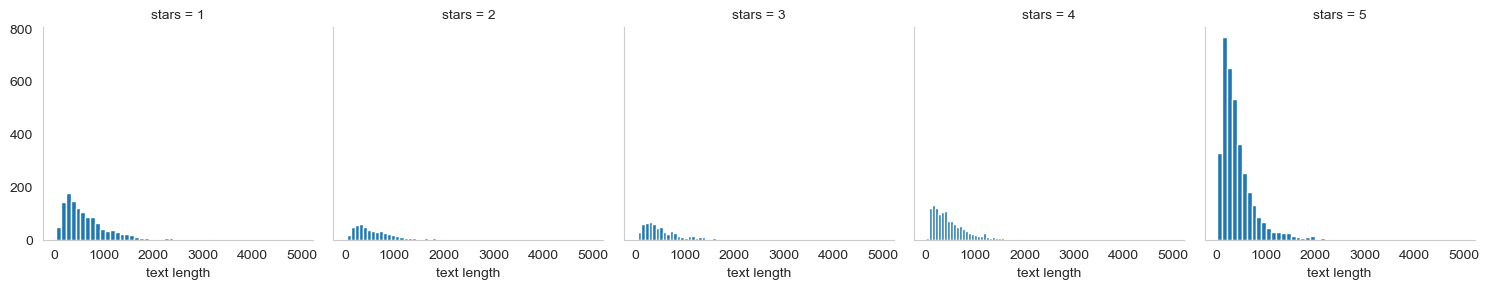

In [11]:
# Configuração do estilo do seaborn para definir o fundo como branco
sns.set_style("whitegrid")

# Crie o FacetGrid
g = sns.FacetGrid(data=reviews, col='stars')

# Mapeie o histograma
g.map(plt.hist, 'text length', bins=50)

# Remova as grades em todos os subplots
for ax in g.axes.flat:
    ax.grid(False)

# Exiba o FacetGrid
plt.show()

C:\Users\pport\AppData\Local\Temp\ipykernel_5168\2696079039.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews['text length'], kde=True, bins=50)


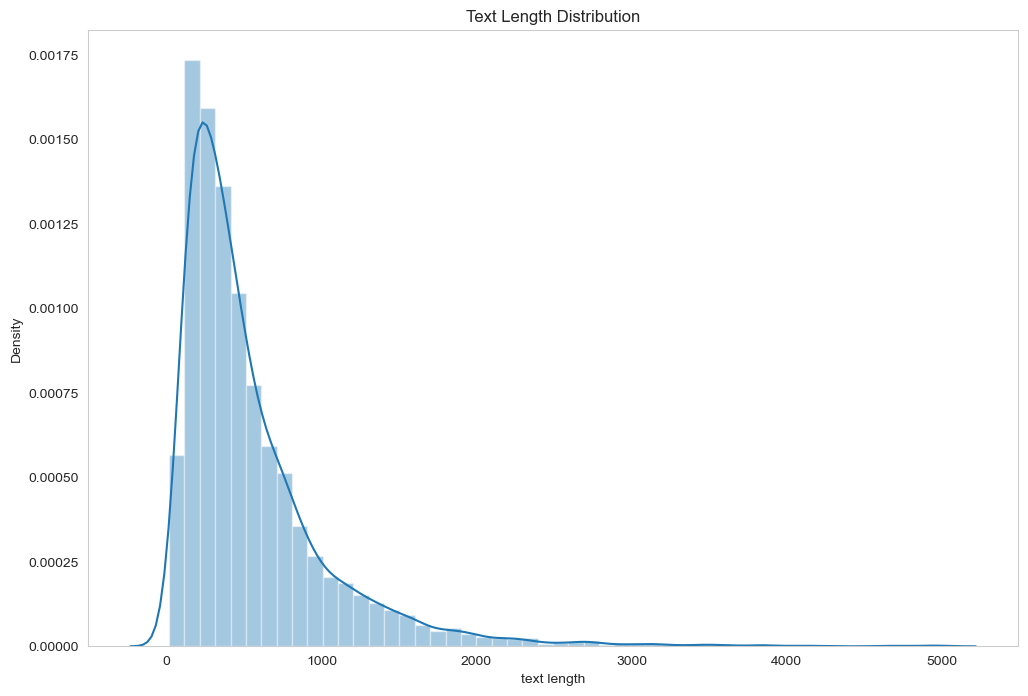

In [12]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Create the distribution graph
sns.distplot(reviews['text length'], kde=True, bins=50)

# Remove the grids
plt.grid(False)

# Add the title
plt.title('Text Length Distribution')

# Display the graph
plt.show()

#### 2.2.2.3 Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

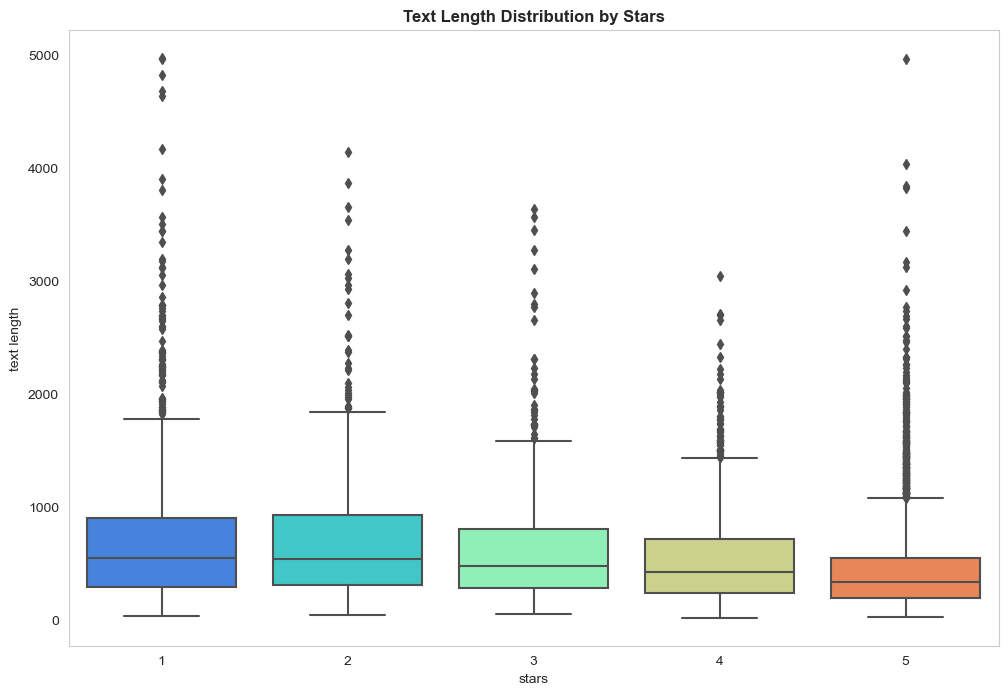

In [13]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='stars', y='text length', data=reviews, palette='rainbow')

# Remove the grids
plt.grid(False)

# Add the title
plt.title('Text Length Distribution by Stars', fontweight='bold')

# Display the graphic
plt.show()

#### 2.2.2.4 Let’s group the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny. We can use the .corr()method from Pandas to find any correlations in the dataframe.

In [14]:
stars = reviews.groupby('stars').mean()
stars.corr()

C:\Users\pport\AppData\Local\Temp\ipykernel_5168\1148758039.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars = reviews.groupby('stars').mean()


useful     funny      cool  text length
useful       1.000000  0.952170 -0.834593     0.867805
funny        0.952170  1.000000 -0.754091     0.906037
cool        -0.834593 -0.754091  1.000000    -0.898693
text length  0.867805  0.906037 -0.898693     1.000000

#### 2.2.2.5 To visualise these correlations, we can use Seaborn’s heatmap. Looking at the map, funny is strongly correlated with useful, and usefulseems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.

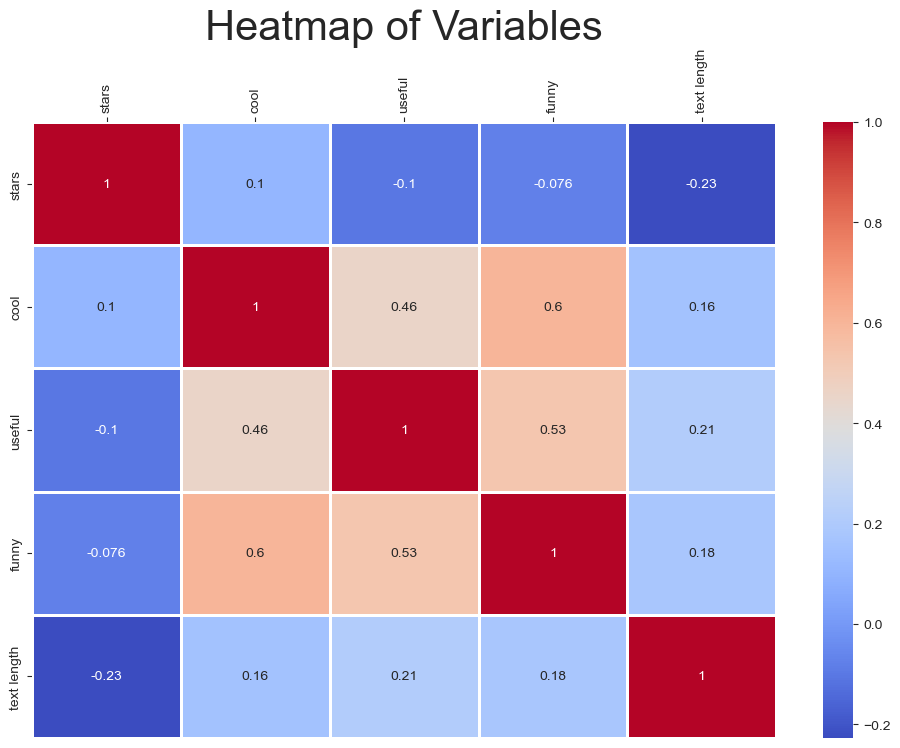

In [15]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the heatmap graphic
yelp_cor = reviews[['stars', 'cool', 'useful', 'funny', 'text length']].corr()

fig = plt.figure(figsize=(12, 8))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)

# Remove the grids
axes.xaxis.set_ticks_position('top')
axes.xaxis.set_tick_params(rotation=90)
axes.yaxis.set_ticks_position('left')

# Add the title
axes.set_title('Heatmap of Variables', fontsize=30)

# Display the graph
plt.show()

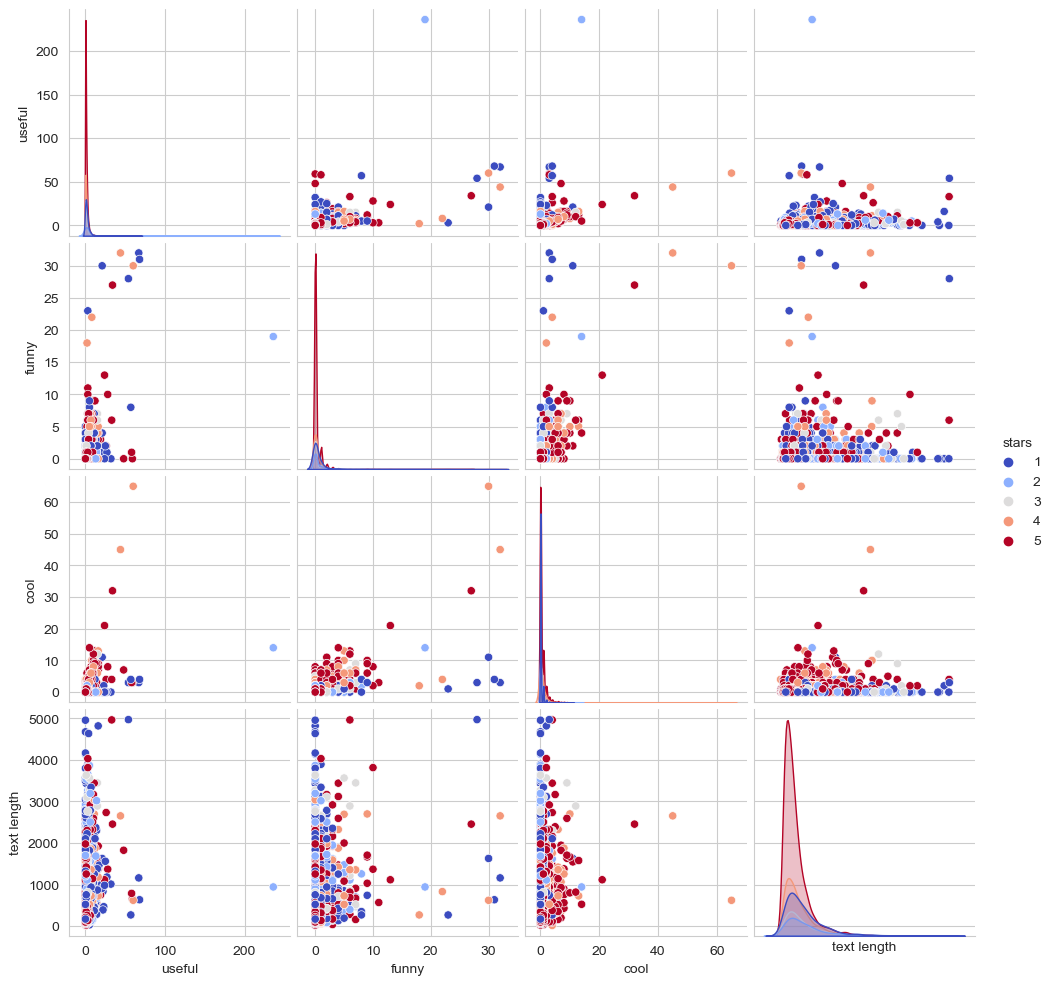

In [16]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the pairplot graph
sns.pairplot(reviews, hue='stars', palette='coolwarm')

# Remove the grids from the x and y axes
plt.xticks([])
plt.yticks([])

# Remove the grids
plt.grid(False)

# Display the graph
plt.show()

## 2.3 Data cleaning

### 2.3.1 Let's start by removing any non-alpha chars, using a regular expression.

In [17]:
def clean_text(text):
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)
    return cleaned_text

# Apply the text cleaning function to the 'text' column of the reviews DataFrame
reviews['text'] = reviews['text'].apply(clean_text)

### 2.3.2 In the review, some character references such as “&amp;amp;” are not useful in our text content and we removed them.

In [18]:
reviews['text'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in reviews['text']]

### 2.3.3 Next, we wanted to make sure all the reviews are in English and we did the language detection with a library called langdetect and the specific function detect_langs.

In [19]:
# Assuming reviews.text is a list of text data
languages = []

for text in reviews.text:
    try:
        detected_langs = detect_langs(text)
        top_lang = str(detected_langs[0]).split(':')[0]
        languages.append(top_lang)
    except:
        languages.append("Unknown")

reviews['language'] = languages

### 2.3.4 Next, we can convert all letters to lowercase, ensuring that words like "Amazing" "AMAZING" and "amazing" are all represented in the same way.

In [20]:
# Convert all letters to lowercase
reviews['text'] = reviews['text'].str.lower()

# 3. Text Mining

## 3.1 Stopwords

In [21]:
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place', 'br', 'href', 'good', 'great'])

## 3.2 Word Cloud

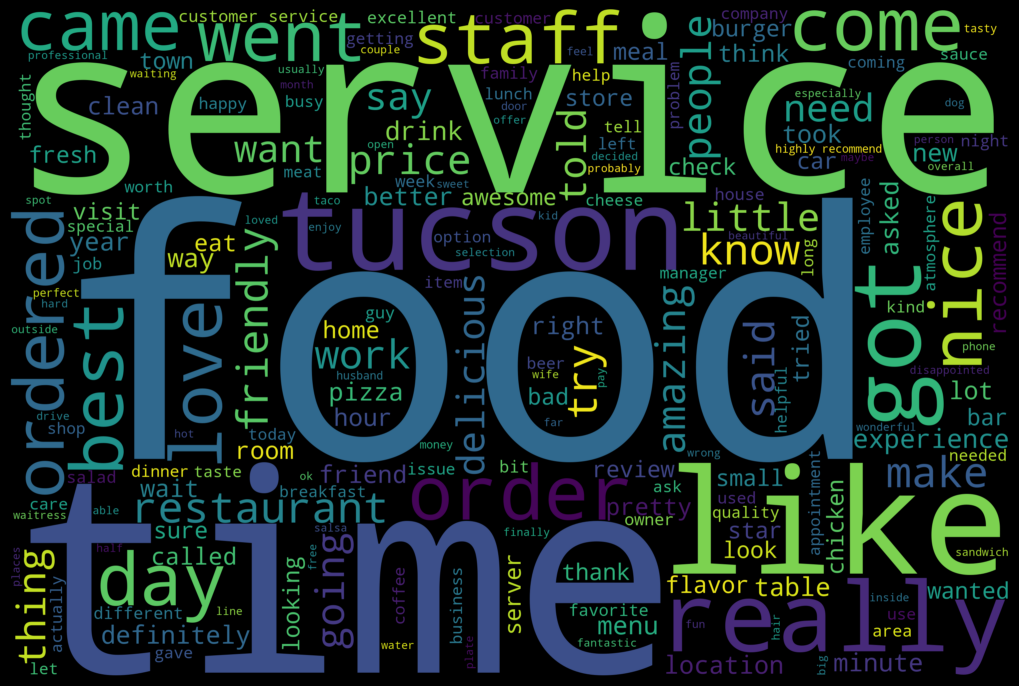

In [22]:
# concatenate all the reviews into one single string 
full_text = ' '.join(reviews['text'])
wordcloud = WordCloud( width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords=my_stop_words).generate(full_text)
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

### 3.2.1 Positive Reviews (4 and 5 Stars)

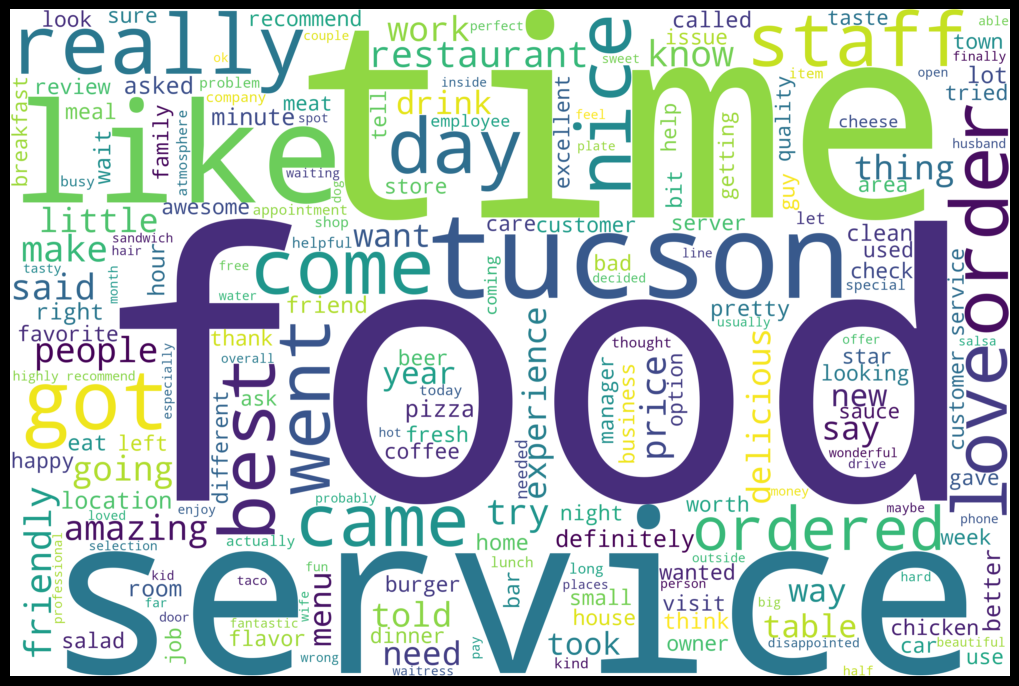

In [23]:
# Filter the reviews DataFrame to include only reviews with star ratings 1 or 2
filtered_reviews = reviews[reviews['stars'].isin([4, 5])]

# Concatenate the text of the filtered reviews into one single string
full_text_positive = ' '.join(filtered_reviews['text'])

# Create the word cloud using the filtered text
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='white',
    stopwords=my_stop_words
).generate(full_text)

# Plot the word cloud
fig = plt.figure(
    figsize=(10, 7),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3.2.2 Negative Reviews (1 and 2 Stars)

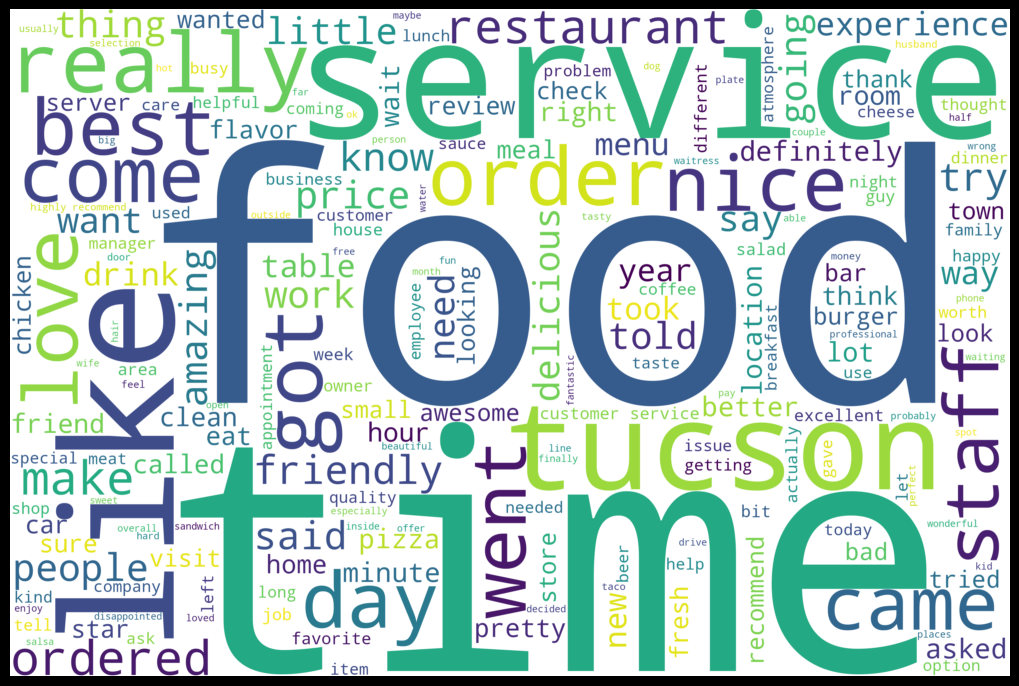

In [24]:
# Filter the reviews DataFrame to include only reviews with star ratings 1 or 2
filtered_reviews = reviews[reviews['stars'].isin([1, 2])]

# Concatenate the text of the filtered reviews into one single string
full_text_negative = ' '.join(filtered_reviews['text'])

# Create the word cloud using the filtered text
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='white',
    stopwords=my_stop_words
).generate(full_text)

# Plot the word cloud
fig = plt.figure(
    figsize=(10, 7),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3.2.3 Neutral Reviews (3 Stars)

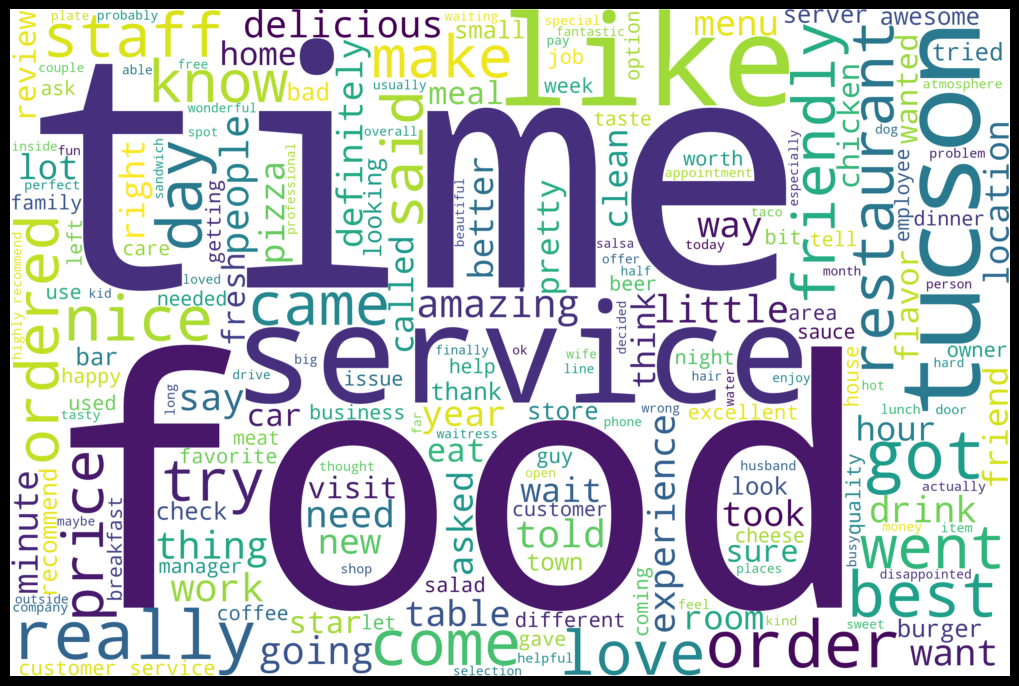

In [25]:
# Filter the reviews DataFrame to include only reviews with star ratings 1 or 2
filtered_reviews = reviews[reviews['stars'].isin([3])]

# Concatenate the text of the filtered reviews into one single string
full_text_neutral = ' '.join(filtered_reviews['text'])

# Create the word cloud using the filtered text
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='white',
    stopwords=my_stop_words
).generate(full_text)

# Plot the word cloud
fig = plt.figure(
    figsize=(10, 7),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 3.3 Tokenization and Vectorization

### 3.3.1 Bag-of-Words 

In [26]:
nltk.download('punkt')
word_tokens = word_tokenize(full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

word_pairs = list(ngrams(tokens, 2))

# Calculate the frequency distribution of pairs of 2 words
bigram_dist = FreqDist(word_pairs)
dist_pair = pd.DataFrame(bigram_dist.most_common(20),columns=['Words', 'Frequency'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


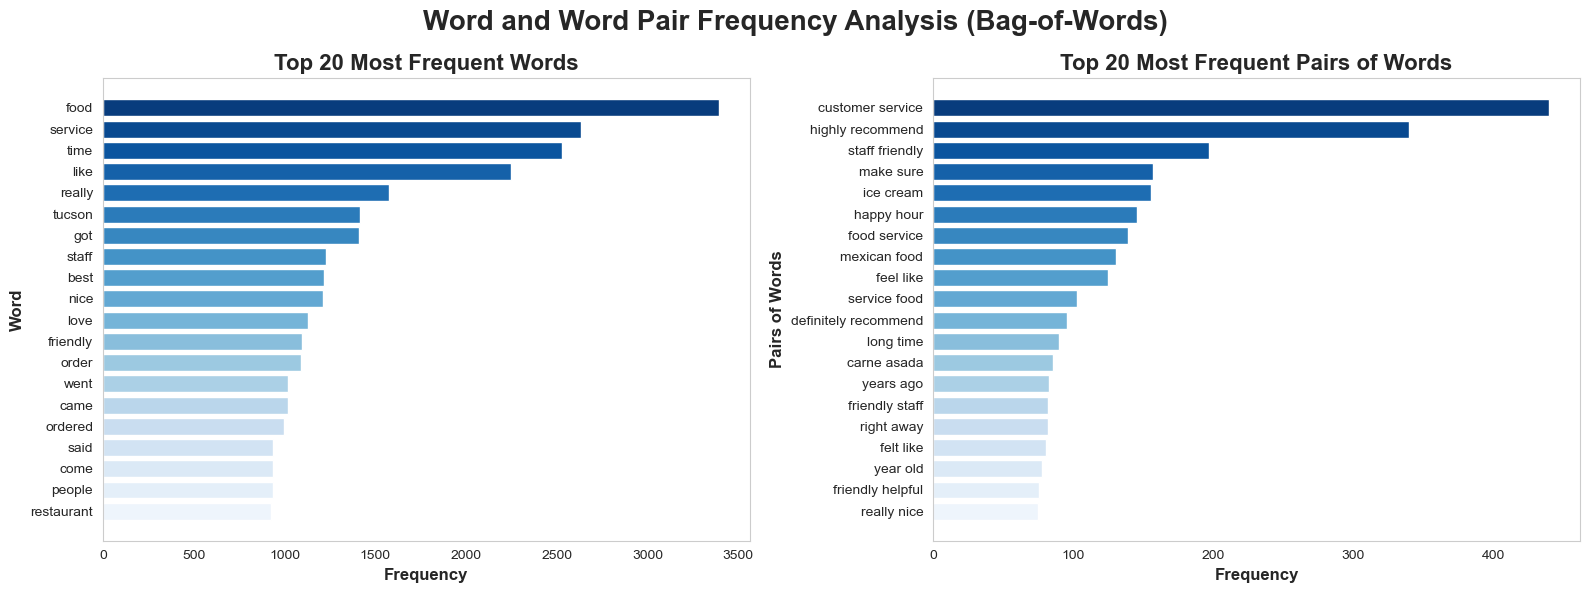

In [27]:
# Create a color palette of blue tones
n_colors = 20 # Choose the desired number of shades of blue
custom_palette = sns.color_palette("Blues", n_colors=n_colors)

# Invert the palette so that darker colors correspond to higher frequencies
custom_palette = custom_palette[::-1]

# Create a figure with two subplots (one for the top 20 words and one for the top 20 bigrams)
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns

# Plot the top 20 words with the custom color palette
axes[0].barh(dist['Word'], dist['Frequency'], color=custom_palette)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Word', fontsize=12, fontweight='bold')
axes[0].set_title('Top 20 Most Frequent Words', fontsize=16, fontweight='bold')

# Convert the tuples in 'dist_pair['Words']' to strings
bigram_strings = [' '.join(pair) for pair in dist_pair['Words']]

# Plot the top 20 bigrams with the custom color palette
axes[1].barh(bigram_strings, dist_pair['Frequency'], color=custom_palette)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Pairs of Words', fontsize=12, fontweight='bold')
axes[1].set_title('Top 20 Most Frequent Pairs of Words', fontsize=16, fontweight='bold')

# Remove the grids
axes[0].grid(False)
axes[1].grid(False)

# Adjust the spacing between subplots
plt.suptitle('Word and Word Pair Frequency Analysis (Bag-of-Words)', fontsize=20, fontweight='bold')
plt.tight_layout()

# Show the plots
plt.show()

#### 3.3.1.1 Stemming - Stemming is a technique that aims to remove the suffixes from a word to find its root (or "stem"). The goal is to group words with similar forms, even if they are not the same word. 

In [28]:
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])

# Aplicar stemming aos pares de palavras (bigrams)
stemmed_bigram_dist = FreqDist([(porter.stem(word1), porter.stem(word2)) for word1, word2 in word_pairs])
stemmed_dist_pair = pd.DataFrame(stemmed_bigram_dist.most_common(20), columns=['Words', 'Frequency'])

C:\Users\pport\AppData\Local\Temp\ipykernel_5168\4000474200.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


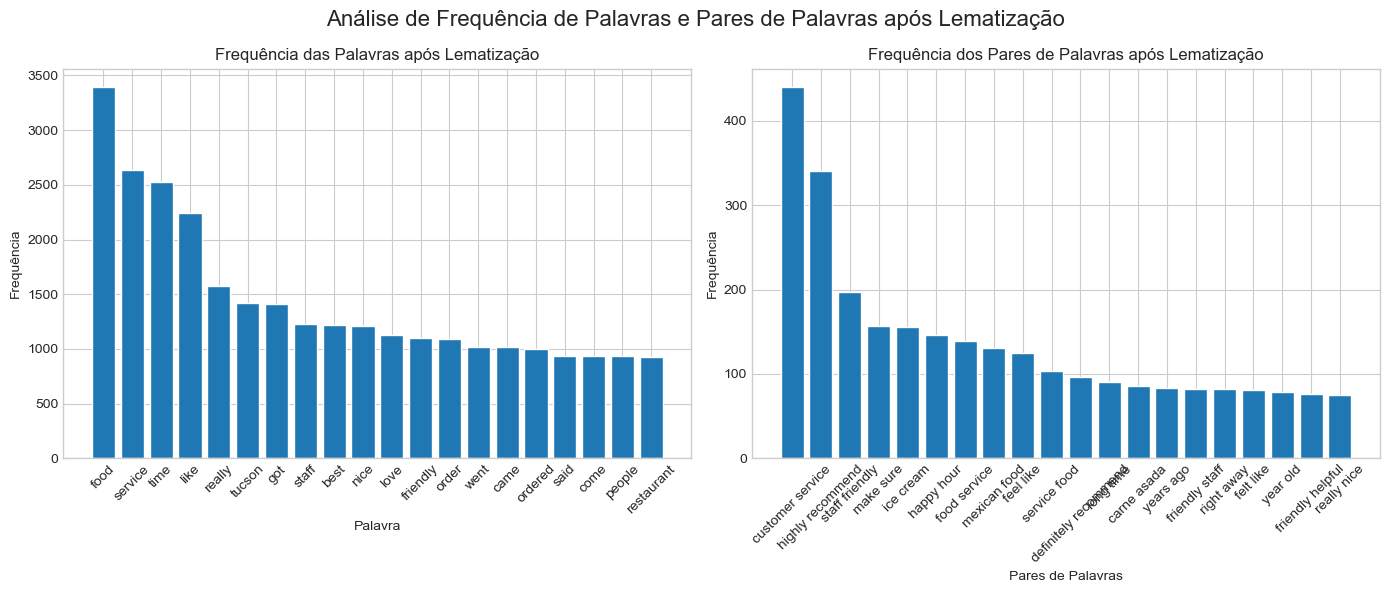

In [29]:
# Defina o estilo de fundo como 'seaborn-whitegrid'
plt.style.use('seaborn-whitegrid')

# Crie uma figura geral para os gráficos
plt.figure(figsize=(14, 6))

# Gráfico de barras para a frequência de palavras
plt.subplot(121)
plt.bar(dist['Word'], dist['Frequency'])
plt.title('Frequência das Palavras após Lematização')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Gráfico de barras para a frequência de pares de palavras
plt.subplot(122)
plt.bar(dist_pair['Words'].apply(lambda x: f"{x[0]} {x[1]}"), dist_pair['Frequency'])
plt.title('Frequência dos Pares de Palavras após Lematização')
plt.xlabel('Pares de Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Título geral acima dos gráficos
plt.suptitle('Análise de Frequência de Palavras e Pares de Palavras após Lematização', fontsize=16)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

#### 3.3.1.2 Lemmatization - determine the base form of a word, called the "lemma," taking into account the grammatical structure and context of the word. This involves consulting a dictionary or a list of lemmas to find the correct base form of a word.

In [30]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

# Frequency of words after lemmatization
token_dist = FreqDist(lemmatized_tokens)
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

# Word pairs after lemmatization
word_pairs = list(ngrams(lemmatized_tokens, 2))
bigram_dist = FreqDist(word_pairs)
dist_pair = pd.DataFrame(bigram_dist.most_common(20), columns=['Words', 'Frequency'])

# If you wish, you can apply lemmatization to the word pairs (bigrams) as well, in the same way as you did with stemming.

# Results after lemmatization
print(dist)
print(dist_pair)

          Word  Frequency
0         food       3457
1         time       3071
2      service       2733
3         like       2282
4       really       1578
5       tucson       1416
6          got       1411
7        staff       1235
8         best       1218
9        order       1214
10        nice       1212
11        love       1176
12         day       1140
13        come       1138
14        make       1121
15  restaurant       1114
16    friendly       1096
17        went       1020
18        came       1017
19       price       1012
                      Words  Frequency
0       (customer, service)        442
1       (highly, recommend)        340
2         (staff, friendly)        197
3              (make, sure)        161
4              (ice, cream)        158
5              (feel, like)        152
6             (happy, hour)        148
7           (food, service)        139
8           (mexican, food)        131
9           (service, food)        104
10              (year, ol

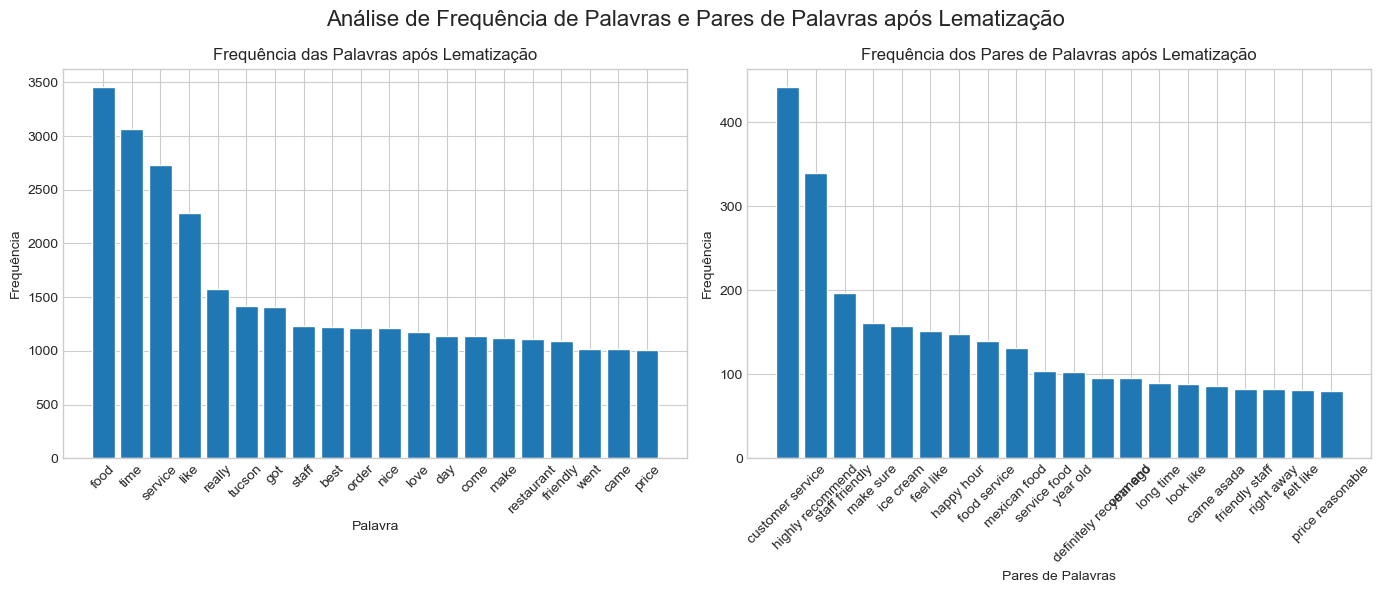

In [31]:
# Crie uma figura geral para os gráficos
plt.figure(figsize=(14, 6))

# Gráfico de barras para a frequência de palavras
plt.subplot(121)
plt.bar(dist['Word'], dist['Frequency'])
plt.title('Frequência das Palavras após Lematização')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Gráfico de barras para a frequência de pares de palavras
plt.subplot(122)
plt.bar(dist_pair['Words'].apply(lambda x: f"{x[0]} {x[1]}"), dist_pair['Frequency'])
plt.title('Frequência dos Pares de Palavras após Lematização')
plt.xlabel('Pares de Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Título geral acima dos gráficos
plt.suptitle('Análise de Frequência de Palavras e Pares de Palavras após Lematização', fontsize=16)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

### 3.3.2 N-grams 

In [32]:
# Convert the set of stop words into a list
my_stop_words_list = list(my_stop_words)

# Create the vectorizer with the stop words as a list for bigrams
vect_bigrams = CountVectorizer(stop_words=my_stop_words_list, ngram_range=(2, 2))
bigrams = vect_bigrams.fit_transform(reviews['text'])
feature_names_bigrams = vect_bigrams.get_feature_names_out()
bigram_df = pd.DataFrame(bigrams.toarray(), columns=feature_names_bigrams)

# Create the vectorizer with the stop words as a list for trigrams
vect_trigrams = CountVectorizer(stop_words=my_stop_words_list, ngram_range=(3, 3))
trigrams = vect_trigrams.fit_transform(reviews['text'])
feature_names_trigrams = vect_trigrams.get_feature_names_out()
trigram_df = pd.DataFrame(trigrams.toarray(), columns=feature_names_trigrams)

# Calculate the total frequency of each bigram
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']

# Calculate the total frequency of each trigram
trigram_frequency = pd.DataFrame(trigram_df.sum(axis=0)).reset_index()
trigram_frequency.columns = ['trigram', 'frequency']

# Sort the bigrams and trigrams by frequency in descending order and take the first 20
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)
trigram_frequency = trigram_frequency.sort_values(by='frequency', ascending=False).head(20)

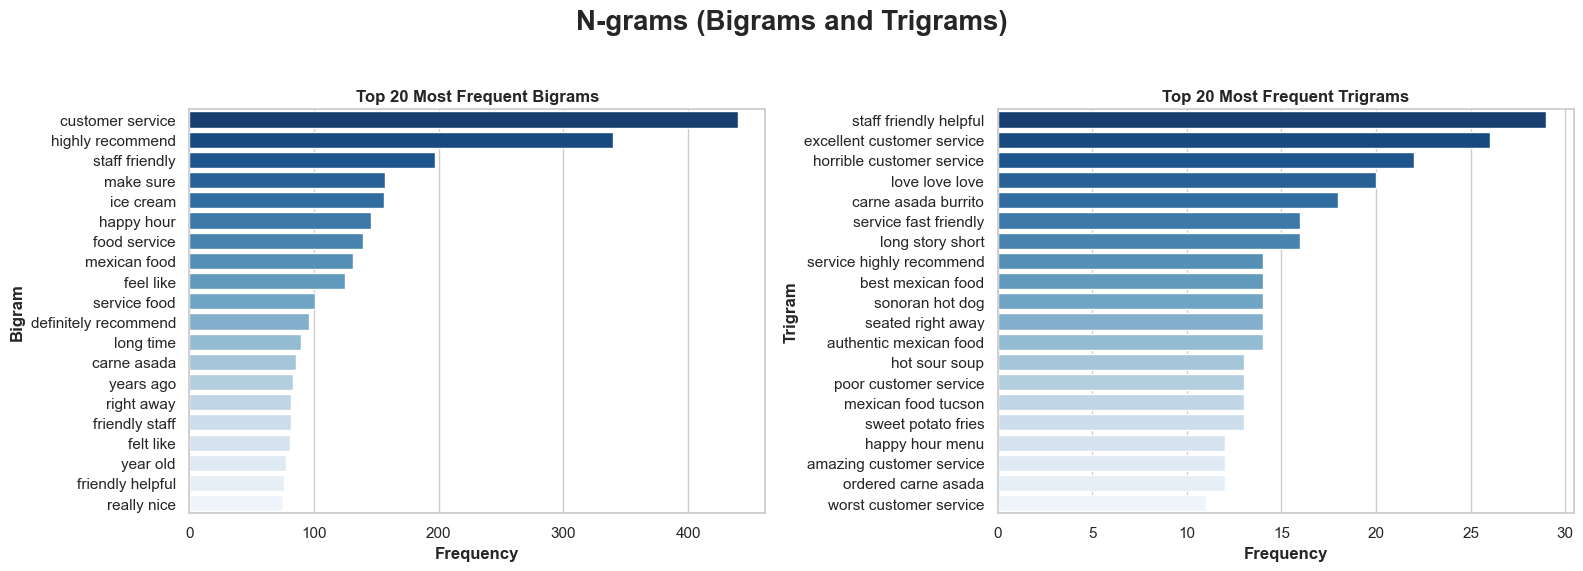

In [33]:
# Set the plot style (optional)
sns.set(style="whitegrid")

# Create subplots for bigrams and trigrams
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create a color palette of blue tones
n_colors = 20 # Choose the desired number of shades of blue
custom_palette = sns.color_palette("Blues", n_colors=n_colors)

# Invert the palette so that darker colors correspond to higher frequencies
custom_palette = custom_palette[::-1]

# Plot the bigrams with the custom color palette
sns.barplot(x='frequency', y='bigram', data=bigram_frequency, palette=custom_palette, ax=axes[0])
axes[0].set_xlabel('Frequency', fontweight='bold')
axes[0].set_ylabel('Bigram', fontweight='bold')
axes[0].set_title('Top 20 Most Frequent Bigrams', fontweight='bold')

# Plot the trigrams with the custom color palette
sns.barplot(x='frequency', y='trigram', data=trigram_frequency, palette=custom_palette, ax=axes[1])
axes[1].set_xlabel('Frequency', fontweight='bold')
axes[1].set_ylabel('Trigram', fontweight='bold')
axes[1].set_title('Top 20 Most Frequent Trigrams', fontweight='bold')

# Add a general title
fig.suptitle('N-grams (Bigrams and Trigrams)', fontsize=20, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the top margin for the title
plt.show()

### 3.3.3 Word2Vec for vectorization

In [34]:
df_good = reviews[reviews['stars'] > 3].copy()
good_reviews = ' '.join(df_good.text)
# split the long string into sentences
sentences_good = sent_tokenize(good_reviews)
good_token_clean = list()
# get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [35]:
good_token_clean

[['food',
  'environment',
  'loved',
  'wine',
  'going',
  'dine',
  'stick',
  'burgers',
  'fries',
  'expect',
  'burger',
  'milkshakes',
  'avoid',
  'salads',
  'par',
  'costco',
  'helpful',
  'staff',
  'clean',
  'costco',
  'carries',
  'wide',
  'variety',
  'items',
  'change',
  'weekly',
  'excellent',
  'fresh',
  'meats',
  'vegetables',
  'bakery',
  'pre',
  'items',
  'parties',
  'selection',
  'alcohol',
  'wine',
  'beer',
  'available',
  'coming',
  'lives',
  'went',
  'couple',
  'years',
  'food',
  'filet',
  'mignon',
  'juicy',
  'tasty',
  'beans',
  'texas',
  'toast',
  'salsa',
  'salad',
  'salad',
  'basic',
  'favorite',
  'salad',
  'live',
  'music',
  'father',
  'day',
  'hit',
  'excellent',
  'band',
  'played',
  'service',
  'connie',
  'serving',
  'years',
  'years',
  'thanks',
  'remembering',
  'keeping',
  'happy',
  'come',
  'tucson',
  'conference',
  'colleagues',
  'point',
  'eat',
  'days',
  'row',
  'loved',
  'visit',
  'b

In [36]:
model_ted = Word2Vec(sentences=good_token_clean, vector_size=500, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('zealand', 6.3886364e-05),
 ('margherita', 6.38863e-05),
 ('ms', 6.388624e-05),
 ('checca', 6.388618e-05),
 ('considerations', 6.3886175e-05),
 ('connie', 6.388616e-05),
 ('respects', 6.388611e-05),
 ('tomatoes', 6.388611e-05),
 ('fertility', 6.38861e-05),
 ('elfa', 6.38861e-05)]

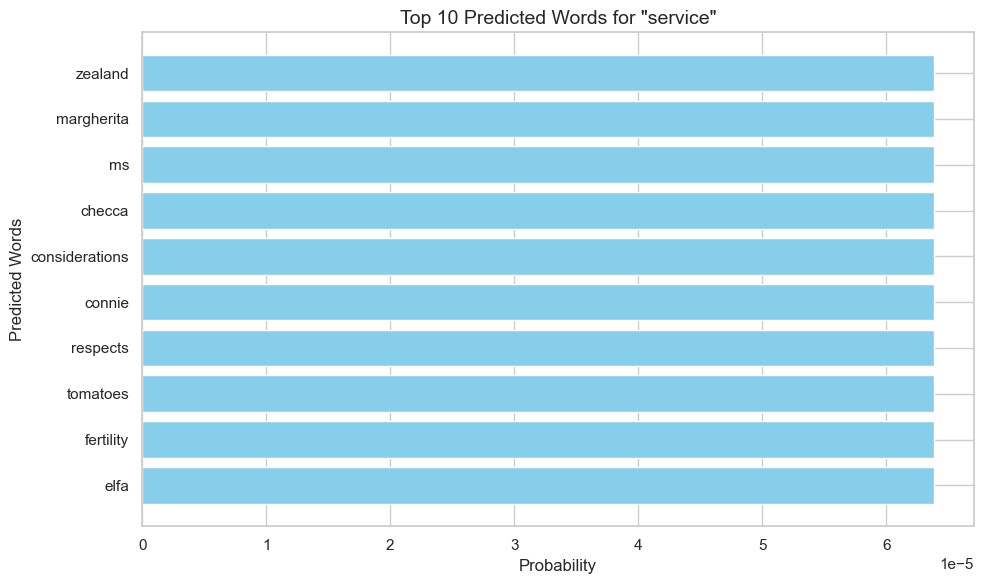

In [37]:
# Replace 'service' with the word you want to predict
target_word = 'service'

# Use the Word2Vec model to predict the top 10 words for the target word
predictions = model_ted.predict_output_word([target_word], topn=10)

# Extract the predicted words and their probabilities
predicted_words = [word for word, _ in predictions]
probabilities = [probability for _, probability in predictions]

# Create a bar chart to visualize the predictions
plt.figure(figsize=(10, 6))
plt.barh(predicted_words, probabilities, color='skyblue')
plt.xlabel('Probability', fontsize=12)
plt.ylabel('Predicted Words', fontsize=12)
plt.title(f'Top 10 Predicted Words for "{target_word}"', fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()

### 3.3.4 Spacy

In [38]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming 'full_text' contains your text data
doc = nlp(full_text[:1000])

# Initialize a list to store tokens
tokens = []

# Iterate through the spaCy doc
for token in doc:
    # Check if the token is a valid word (alpha) and not in your stop words
    if token.is_alpha and token.text not in my_stop_words:
        tokens.append(token.text)
        print(token.text, token.lemma_)

# Calculate the frequency distribution of tokens
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

food food
environment environment
loved love
wine wine
going go
dine dine
stick stick
burgers burger
fries fry
expect expect
burger burger
milkshakes milkshake
avoid avoid
salads salad
par par
costco costco
helpful helpful
staff staff
clean clean
costco costco
carries carry
wide wide
variety variety
items item
change change
weekly weekly
excellent excellent
fresh fresh
meats meat
vegetables vegetable
bakery bakery
pre pre
items item
parties party
selection selection
alcohol alcohol
wine wine
beer beer
available available
coming come
lives life
went go
couple couple
years year
food food
filet filet
mignon mignon
juicy juicy
tasty tasty
beans bean
texas texas
toast toast
salsa salsa
salad salad
salad salad
basic basic
favorite favorite
salad salad
live live
music music
father father
day day
hit hit
excellent excellent
band band
played play
service service
connie connie
serving serve
years year
years year
thanks thank
remembering remember
keeping keep
happy happy
come come
tucson tucson
c

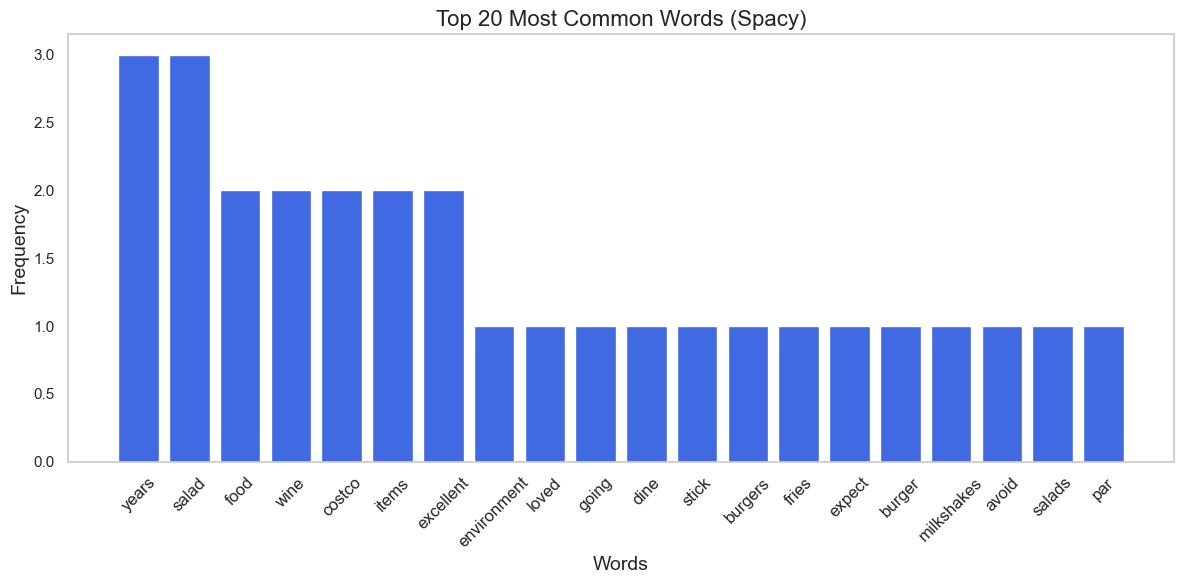

In [39]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar chart with a white background
ax.bar(dist['Word'], dist['Frequency'], color='#4169E1')

# Set the background color to white
ax.set_facecolor('white')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, fontsize=12)

# Add labels and title
ax.set_xlabel('Words', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Top 20 Most Common Words (Spacy)', fontsize=16)

# Remove the gray gridlines
ax.grid(False)

# Display the graph
plt.tight_layout()
plt.show()

### 3.3.5 Making use of regular expressions

In [40]:
# Define your pattern for tokenization
pattern = r'''(?x)           # set flag to allow verbose regexps
        (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A.
        | \w+(?:-\w+)*       # words with optional internal hyphens
        | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
        | \.\.\.             # ellipsis
        | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
        '''

# Tokenize the text using the specified pattern
tokens = regexp_tokenize(full_text, pattern)

# Filter and clean the tokens (remove non-alphanumeric and stopwords)
filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in my_stop_words]

# Calculate the frequency distribution of tokens
token_dist = FreqDist(filtered_tokens)

# Create a DataFrame with the top 20 most common words and their frequencies
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

# Print the DataFrame or perform further analysis
print(dist)

          Word  Frequency
0         food       3394
1      service       2635
2         time       2530
3         like       2246
4       really       1578
5       tucson       1415
6          got       1389
7        staff       1229
8         best       1218
9         nice       1212
10        love       1128
11    friendly       1096
12       order       1089
13        went       1020
14        came       1017
15     ordered        996
16        said        938
17        come        935
18      people        935
19  restaurant        928


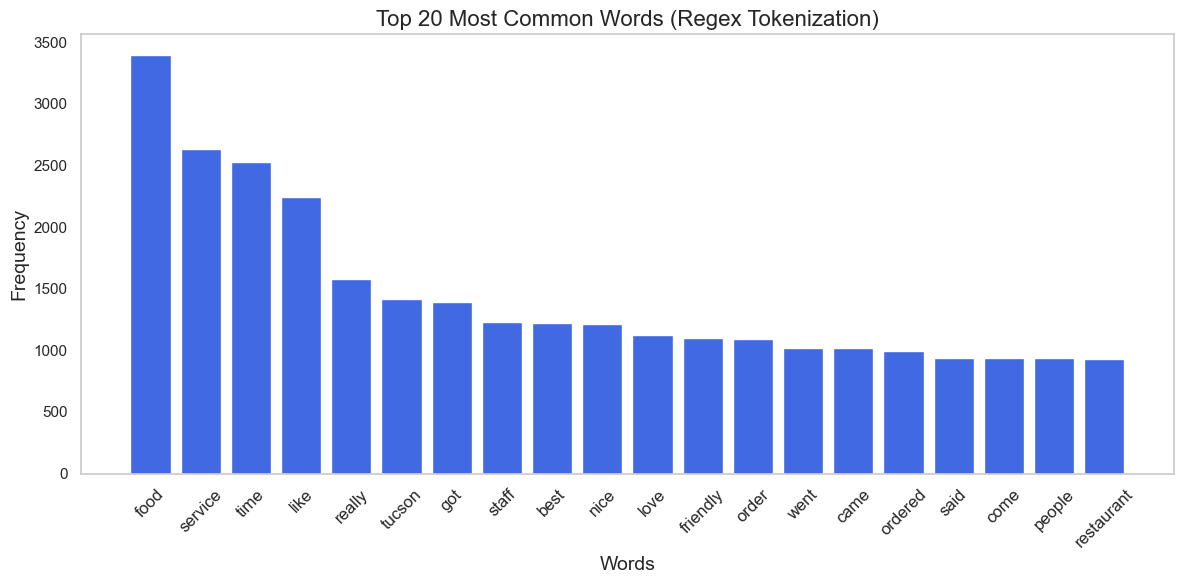

In [41]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar chart with a white background
ax.bar(dist['Word'], dist['Frequency'], color='#4169E1')

# Set the background color to white
ax.set_facecolor('white')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, fontsize=12)

# Add labels and title
ax.set_xlabel('Words', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Top 20 Most Common Words (Regex Tokenization)', fontsize=16)

# Remove the gray gridlines
ax.grid(False)

# Display the graph
plt.tight_layout()
plt.show()

### 3.3.6 Dealing with multi-word expressions (MWE)

In [42]:
# Suppose 'full_text' contains your text data
doc = nlp(full_text[:1000]) # Process the first 1000 characters of the text

# Initialize an MWETokenizer
mwe_tokenizer = MWETokenizer()

# Initialize lists to store sentences and tokens
sentences = []
tokens = []

# Iterate through the sentences in the spaCy document
for sent in doc.sents:
    sentence_text = sent.text
    sentences.append(sentence_text)
    
    # Tokenize the sentence using MWETokenizer
    sentence_tokens = mwe_tokenizer.tokenize(sentence_text.split())
    
    # Filter and clean tokens (remove non-alphanumerics and stopwords)
    filtered_sentence_tokens = [token.lower() for token in sentence_tokens if token.lower() not in my_stop_words]
    
    # Add filtered tokens to the token list
    tokens.extend(filtered_sentence_tokens)

# Calculate the frequency distribution of the tokens
token_dist = FreqDist(tokens)

# Create a DataFrame with the 20 most common words and their frequencies
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

# Print the DataFrame or perform additional analysis
print(dist)

           Word  Frequency
0         years          3
1         salad          3
2          food          2
3          wine          2
4        costco          2
5         items          2
6     excellent          2
7   environment          1
8         loved          1
9         going          1
10         dine          1
11        stick          1
12      burgers          1
13        fries          1
14       expect          1
15       burger          1
16   milkshakes          1
17        avoid          1
18       salads          1
19          par          1


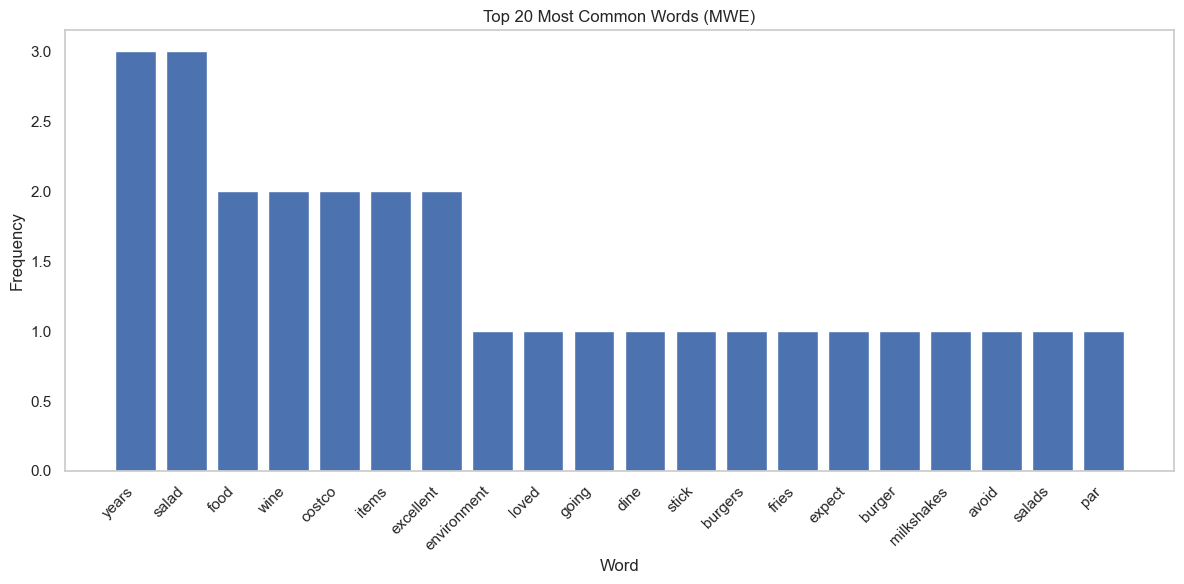

In [43]:
# Criar um gráfico de barras com fundo branco e sem grades
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')  # Define o fundo do gráfico como branco
plt.grid(False)  # Remove as grades
plt.bar(dist['Word'], dist['Frequency'])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words (MWE)')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()

# 4. Sentiment Analysis

## 4.1 Lexicon-based Tool — VADER

In [44]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

#n_samples = 20000
#reviews_vader = reviews.sample(n=n_samples, random_state=42)

reviews_vader = reviews

# COnvert the column 'date' to datetime
reviews_vader['date'] = pd.to_datetime(reviews_vader['date'])
# Create 'target' column based on the specified conditions
reviews_vader['target'] = reviews_vader['stars'].apply(lambda rating: 1 if rating > 3 else (-1 if rating < 3 else 0))

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = reviews_vader['text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])

# Definir a coluna 'date' como índice
sentiment.index = reviews_vader['date']

# Agora você pode usar resample para calcular a média mensal
monthly_sentiment = sentiment.resample('M').mean()

# Now, add your code for evaluating sentiment analysis performance
y_pred = []
y = reviews_vader['target']
for rev in reviews_vader['text']:
    y_pred.append(1 if sid.polarity_scores(rev)['compound'] > 0 else 0)

#Save VADER reults
VADER_accuracy = accuracy_score(y, y_pred)
VADER_precision = precision_score(y, y_pred, average='weighted')
VADER_recall = recall_score(y, y_pred, average='weighted')
VADER_f1 = f1_score(y, y_pred, average='weighted')

print('Accuracy: ', VADER_accuracy)
print('Precision: ', VADER_precision)
print('Recall: ', VADER_recall)
print('F1: ', VADER_f1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pport\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy:  0.6577333333333333
Precision:  0.515205428326586
Recall:  0.6577333333333333
F1:  0.5774970662036558


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


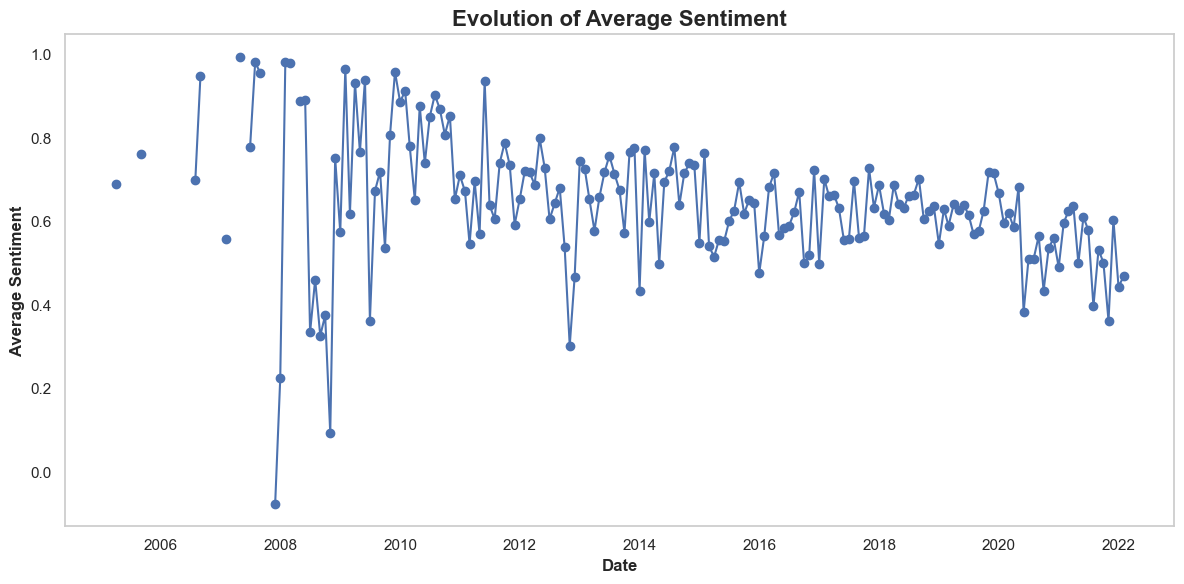

In [45]:
# Plot the monthly sentiment scores
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-')
ax.set_title('Evolution of Average Sentiment', fontsize=16, fontweight='bold')  
ax.set_xlabel('Date', fontweight='bold')  
ax.set_ylabel('Average Sentiment', fontweight='bold')   
ax.grid(False)

# Format the x-axis to show only the years
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))

# Set the background color to white
ax.set_facecolor('white')

# Show the graph
plt.tight_layout()
plt.show()

## 4.2 Supervised Learning Classifiers

C:\Users\pport\AppData\Local\Temp\ipykernel_5168\187594173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['stars'].apply(lambda rating: +1 if rating > 3 else -1)


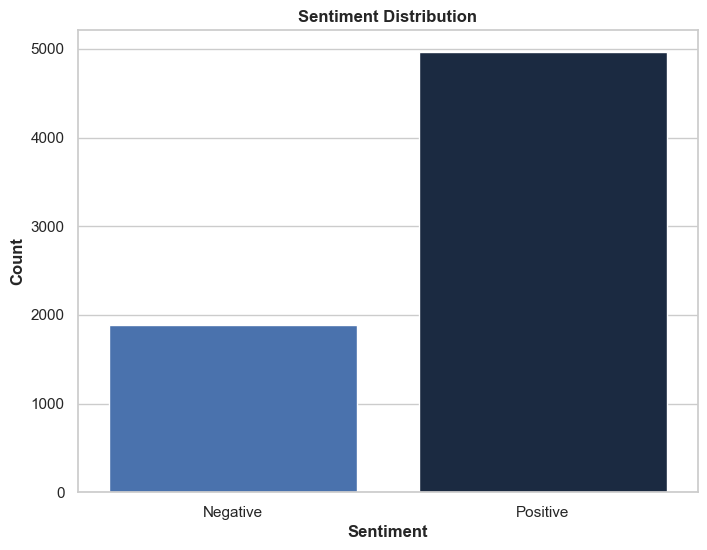

In [58]:
df = reviews
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda rating: +1 if rating > 3 else -1)

# Count the number of samples for each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Define custom colors (two shades of blue)
colors = ['#3a6fbd', '#152947']  # You can adjust the color codes as needed

# Create a bar chart with custom colors and labels
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.title('Sentiment Distribution', fontweight='bold')
plt.xlabel('Sentiment', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

### 4.2.1 CountVectorizer 

In [59]:
# vectorization
vect = CountVectorizer(max_features=300, stop_words='english')
vect.fit(df.text)
X = vect.transform(df.text)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4794, 300), (2055, 300), (4794,), (2055,))

#### 4.2.1.1 Logistic Regression

In [60]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_CV = logreg.score(X_train, y_train) #Use for results
test_score_CV = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_CV}")
print(f"Score on test set: {test_score_CV}")

Score on training set: 0.909261576971214
Score on test set: 0.8768856447688564


In [61]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_CV = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_CV = pd.DataFrame(con_mat_lr_CV, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_CV)
print('The Classification report for Logistic Regression')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0          414          152
True 1          101         1388

The Classification report for Logistic Regression


precision    recall  f1-score      support
-1             0.803883  0.731449  0.765957   566.000000
1              0.901299  0.932169  0.916474  1489.000000
accuracy       0.876886  0.876886  0.876886     0.876886
macro avg      0.852591  0.831809  0.841216  2055.000000
weighted avg   0.874468  0.876886  0.875018  2055.000000

In [62]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=10, random_state=1))])

In [63]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The confusion matrix for logistic regression')
con_mat_lr_final_CV = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_CV = pd.DataFrame(con_mat_lr_final_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_CV)

# Creation of the ranking report
print('The classification report for the logistic regression')
report_lr_final_CV = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_CV = pd.DataFrame(report_lr_final_CV).transpose()
df_First_Approach_Logistics_Regression_Pipeline = df_report_lr_final_CV
display(df_report_lr_final_CV)

Score on training set: 0.9071756362119315
Score on test set: 0.8744525547445255
The confusion matrix for logistic regression


Predicted 0  Predicted 1
True 0          418          148
True 1          110         1379

The classification report for the logistic regression


precision    recall  f1-score      support
-1             0.791667  0.738516  0.764168   566.000000
1              0.903078  0.926125  0.914456  1489.000000
accuracy       0.874453  0.874453  0.874453     0.874453
macro avg      0.847372  0.832320  0.839312  2055.000000
weighted avg   0.872392  0.874453  0.873063  2055.000000

#### 4.2.1.2 Random Forest

In [64]:
my_random_forest_CV = RandomForestClassifier(random_state=1)
my_random_forest_CV.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_CV.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_CV.score(X_test, y_test)}")

Random Forest: 0.9993742177722152
Random Forest: 0.8749391727493917


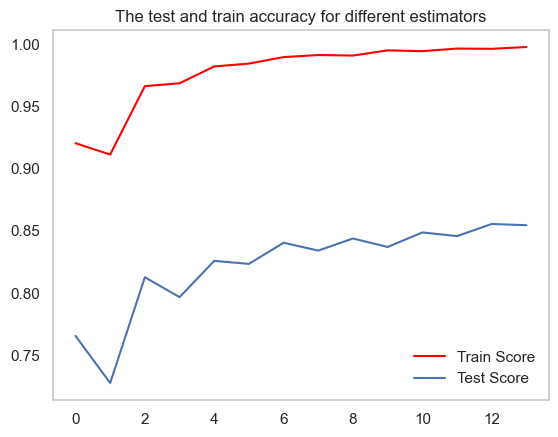

13


In [65]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 12, the both train and test accuracy are increased.

In [66]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [67]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_rf_cv = confusion_matrix(y_test, y_pred_rand)
df_cm_rf_cv = pd.DataFrame(con_mat_rf_cv, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_rf_cv)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_rf_cv = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_lr_cv = pd.DataFrame(report_rf_cv).transpose()
df_First_Approach_Random_Forest_Pipeline = df_report_lr_cv
display(df_report_lr_cv)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0          391          175
True 1          124         1365

The Classification Report for Random Forest


precision    recall  f1-score      support
-1             0.759223  0.690813  0.723404   566.000000
1              0.886364  0.916723  0.901288  1489.000000
accuracy       0.854501  0.854501  0.854501     0.854501
macro avg      0.822793  0.803768  0.812346  2055.000000
weighted avg   0.851346  0.854501  0.852294  2055.000000

#### 4.2.1.3 XGBoost

In [68]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_CV = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_CV.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_CV.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_CV.score(X_test, y_test_mapped)}")

XG Boost train score: 0.8779724655819775
XG Boost test score: 0.8491484184914841


In [69]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_CV = confusion_matrix(y_test_mapped, XGB_model_CV.predict(X_test))
df_cm_xgb_CV = pd.DataFrame(con_mat_xgb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_CV)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_CV = classification_report(y_test_mapped, XGB_model_CV.predict(X_test), output_dict=True)
df_report_xgb_CV = pd.DataFrame(report_xgb_CV).transpose()
display(df_report_xgb_CV)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0          302          264
True 1           46         1443

The Classification report for XGBoost


precision    recall  f1-score      support
0              0.867816  0.533569  0.660832   566.000000
1              0.845343  0.969107  0.903004  1489.000000
accuracy       0.849148  0.849148  0.849148     0.849148
macro avg      0.856579  0.751338  0.781918  2055.000000
weighted avg   0.851532  0.849148  0.836303  2055.000000

In [70]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n_

In [71]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_CV = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_CV.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_CV = XGB_model_CV.predict(X_test)

# Training score
train_score = XGB_model_CV.score(X_train, y_train_mapped)
test_score = XGB_model_CV.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_CV = confusion_matrix(y_test_mapped, y_pred_XGB_CV)
con_mat_XGB_CV = pd.DataFrame(con_mat_XGB_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_CV

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_CV = classification_report(y_test_mapped, XGB_model_CV.predict(X_test), output_dict=True)
df_report_xgb_CV = pd.DataFrame(report_xgb_CV).transpose()
df_First_Approach_XGBoost_Pipeline = df_report_xgb_CV
display(df_report_xgb_CV)

Score on training set: 0.9691280767626199
Score on test set: 0.8890510948905109
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score      support
0              0.839357  0.738516  0.785714   566.000000
1              0.904945  0.946273  0.925148  1489.000000
accuracy       0.889051  0.889051  0.889051     0.889051
macro avg      0.872151  0.842394  0.855431  2055.000000
weighted avg   0.886881  0.889051  0.886744  2055.000000

#### 4.2.1.4 Naive Bayes

In [72]:
# Create and fit the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_nb = naive_bayes.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.8656654151022111
Score on test set: 0.8530413625304136


In [73]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_CV = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_CV = pd.DataFrame(con_mat_nb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_CV)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_CV = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_CV = pd.DataFrame(report_nb_CV).transpose()
display(df_report_nb_CV)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0          401          165
True 1          137         1352

The Classification Report for Naive Bayes


precision    recall  f1-score      support
-1             0.745353  0.708481  0.726449   566.000000
1              0.891233  0.907992  0.899534  1489.000000
accuracy       0.853041  0.853041  0.853041     0.853041
macro avg      0.818293  0.808236  0.812992  2055.000000
weighted avg   0.851054  0.853041  0.851862  2055.000000

In [74]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [75]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes.predict(X_test)

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_CV = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_CV = pd.DataFrame(con_mat_nb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_CV)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_CV = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_CV = pd.DataFrame(report_nb_CV).transpose()
df_First_Approach_Naive_Bayes_Pipeline = df_report_nb_CV
display(df_report_nb_CV)

Score on training set: 0.8656654151022111
Score on test set: 0.8530413625304136
The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0          401          165
True 1          137         1352

The Classification Report for Naive Bayes


precision    recall  f1-score      support
-1             0.745353  0.708481  0.726449   566.000000
1              0.891233  0.907992  0.899534  1489.000000
accuracy       0.853041  0.853041  0.853041     0.853041
macro avg      0.818293  0.808236  0.812992  2055.000000
weighted avg   0.851054  0.853041  0.851862  2055.000000

#### 4.2.1.5 Support Vector Machine

In [76]:
# Create and fit the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=1)
svm_model.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm = svm_model.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model.score(X_train, y_train)
test_score_svm = svm_model.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 0.9163537755527743
Score on test set: 0.8763990267639903


In [77]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_CV = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_CV = pd.DataFrame(con_mat_svm_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_CV)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_CV = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_CV = pd.DataFrame(report_svm_CV).transpose()
display(df_report_svm_CV)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0          428          138
True 1          116         1373

The Classification Report for SVM


precision    recall  f1-score      support
-1             0.786765  0.756184  0.771171   566.000000
1              0.908670  0.922095  0.915333  1489.000000
accuracy       0.876399  0.876399  0.876399     0.876399
macro avg      0.847717  0.839140  0.843252  2055.000000
weighted avg   0.875094  0.876399  0.875627  2055.000000

In [78]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [79]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_CV = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_CV.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_CV.predict(X_test)

# Training score
train_score_svm = svm_model_CV.score(X_train, y_train)
test_score_svm = svm_model_CV.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_CV = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_CV = pd.DataFrame(con_mat_svm_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_CV)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_CV = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_CV = pd.DataFrame(report_svm_CV).transpose()
df_First_Approach_SVM_Pipeline = df_report_svm_CV
display(df_report_svm_CV)

Score on training set: 0.9057154776804339
Score on test set: 0.8807785888077859
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0          407          159
True 1           86         1403

The Classification Report for SVM


precision    recall  f1-score      support
-1             0.825558  0.719081  0.768650   566.000000
1              0.898207  0.942243  0.919698  1489.000000
accuracy       0.880779  0.880779  0.880779     0.880779
macro avg      0.861883  0.830662  0.844174  2055.000000
weighted avg   0.878198  0.880779  0.878096  2055.000000

### 4.2.2 TF-IDF Vectorization (Term Frequency-Inverse Document Frequency) 

In [80]:
tfidf_vect = TfidfVectorizer(max_features=300, stop_words='english')
tfidf_vect.fit(df.text)
X_tfidf = tfidf_vect.transform(df.text)

X_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4794, 300), (2055, 300), (4794,), (2055,))

#### 4.2.2.1 Logistic Regression

In [81]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_TF_IDF = logreg.score(X_train, y_train)
test_score_TF_IDF = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_TF_IDF}")
print(f"Score on test set: {test_score_TF_IDF}")

Score on training set: 0.8973717146433041
Score on test set: 0.8822384428223844


In [82]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_TF_IDF = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_TF_IDF = pd.DataFrame(con_mat_lr_TF_IDF, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_TF_IDF)
print('The Classification report for Logistic Regression')
report_TF_IDF = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_TF_IDF = pd.DataFrame(report_TF_IDF).transpose()
df_report_TF_IDF

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0          396          170
True 1           72         1417

The Classification report for Logistic Regression


precision    recall  f1-score      support
-1             0.846154  0.699647  0.765957   566.000000
1              0.892880  0.951645  0.921326  1489.000000
accuracy       0.882238  0.882238  0.882238     0.882238
macro avg      0.869517  0.825646  0.843642  2055.000000
weighted avg   0.880010  0.882238  0.878534  2055.000000

In [83]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=10, random_state=1))])

In [84]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_TF_IDF = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_TF_IDF = pd.DataFrame(con_mat_lr_final_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_TF_IDF)

# Creation of the ranking report
print('The Classification Report  for Logistic Regression')
report_lr_final_TF_IDF = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_TF_IDF = pd.DataFrame(report_lr_final_TF_IDF).transpose()
df_Second_Approach_Logistic_Regression_Pipeline = df_report_lr_final_TF_IDF
display(df_report_lr_final_TF_IDF)

Score on training set: 0.9113475177304965
Score on test set: 0.8856447688564477
The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0          430          136
True 1           99         1390

The Classification Report  for Logistic Regression


precision    recall  f1-score      support
-1             0.812854  0.759717  0.785388   566.000000
1              0.910878  0.933512  0.922056  1489.000000
accuracy       0.885645  0.885645  0.885645     0.885645
macro avg      0.861866  0.846615  0.853722  2055.000000
weighted avg   0.883880  0.885645  0.884414  2055.000000

#### 4.2.1.2 Random Forest

In [85]:
my_random_forest_TF_IDF = RandomForestClassifier(random_state=1)
my_random_forest_TF_IDF.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_TF_IDF.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_TF_IDF.score(X_test, y_test)}")

Random Forest: 0.9993742177722152
Random Forest: 0.8627737226277372


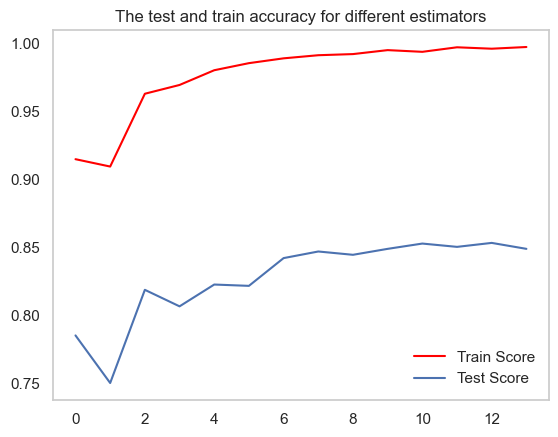

13


In [86]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [87]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [88]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_rf_TF_IDF = confusion_matrix(y_test, y_pred_rand)
df_cm_rf_TF_IDF = pd.DataFrame(con_mat_rf_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_rf_TF_IDF)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_rf_TF_IDF = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_rf_TF_IDF = pd.DataFrame(report_rf_TF_IDF).transpose()
df_Second_Approach_Random_Forest_Pipeline = df_report_rf_TF_IDF
display(df_report_rf_TF_IDF)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0          386          180
True 1          131         1358

The Classification Report for Random Forest


precision    recall  f1-score      support
-1             0.746615  0.681979  0.712835   566.000000
1              0.882965  0.912021  0.897258  1489.000000
accuracy       0.848662  0.848662  0.848662     0.848662
macro avg      0.814790  0.797000  0.805046  2055.000000
weighted avg   0.845411  0.848662  0.846463  2055.000000

#### 4.2.1.3 XGBoost

In [89]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_TF_IDF = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_TF_IDF.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_TF_IDF.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_TF_IDF.score(X_test, y_test_mapped)}")

XG Boost train score: 0.8898623279098874
XG Boost test score: 0.8535279805352798


In [90]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_TF_IDF = confusion_matrix(y_test_mapped, XGB_model_TF_IDF.predict(X_test))
df_cm_xgb_TF_IDF = pd.DataFrame(con_mat_xgb_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_TF_IDF)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_TF_IDF = classification_report(y_test_mapped, XGB_model_TF_IDF.predict(X_test), output_dict=True)
df_report_xgb_TF_IDF = pd.DataFrame(report_xgb_TF_IDF).transpose()
display(df_report_xgb_TF_IDF)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0          310          256
True 1           45         1444

The Classification report for XGBoost


precision    recall  f1-score      support
0              0.873239  0.547703  0.673181   566.000000
1              0.849412  0.969778  0.905613  1489.000000
accuracy       0.853528  0.853528  0.853528     0.853528
macro avg      0.861326  0.758741  0.789397  2055.000000
weighted avg   0.855975  0.853528  0.841595  2055.000000

In [91]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n_

In [92]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_TF_IDF = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_TF_IDF.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_TF_ID = XGB_model_TF_IDF.predict(X_test)

# Training score
train_score = XGB_model_TF_IDF.score(X_train, y_train_mapped)
test_score = XGB_model_TF_IDF.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_TF_IDF = confusion_matrix(y_test_mapped, y_pred_XGB_TF_ID)
con_mat_XGB_TF_IDF = pd.DataFrame(con_mat_XGB_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_TF_IDF

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_TF_IDF = classification_report(y_test_mapped, XGB_model_TF_IDF.predict(X_test), output_dict=True)
df_report_xgb_TF_IDF = pd.DataFrame(report_xgb_TF_IDF).transpose()
df_Second_Approach_xgb_Pipeline = df_report_xgb_TF_IDF
display(df_report_xgb_TF_IDF)

Score on training set: 0.9816437213183146
Score on test set: 0.8788321167883212
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score      support
0              0.803059  0.742049  0.771350   566.000000
1              0.904700  0.930826  0.917577  1489.000000
accuracy       0.878832  0.878832  0.878832     0.878832
macro avg      0.853880  0.836438  0.844463  2055.000000
weighted avg   0.876705  0.878832  0.877302  2055.000000

#### 4.2.1.4 Naive Bayes

In [93]:
# Create and fit the Naive Bayes model
naive_bayes_TF_IDF = MultinomialNB()
naive_bayes_TF_IDF.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_nb = naive_bayes_TF_IDF.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes_TF_IDF.score(X_train, y_train)
test_score_NB = naive_bayes_TF_IDF.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.8550271172298707
Score on test set: 0.8467153284671532


In [94]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_TF_IDF = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_TF_IDF = pd.DataFrame(con_mat_nb_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_TF_IDF)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_TF_IDF = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_TF_IDF = pd.DataFrame(report_nb_TF_IDF).transpose()
display(df_report_nb_TF_IDF)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0          290          276
True 1           39         1450

The Classification Report for Naive Bayes


precision    recall  f1-score      support
-1             0.881459  0.512367  0.648045   566.000000
1              0.840093  0.973808  0.902022  1489.000000
accuracy       0.846715  0.846715  0.846715     0.846715
macro avg      0.860776  0.743088  0.775033  2055.000000
weighted avg   0.851486  0.846715  0.832070  2055.000000

In [95]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [96]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes.predict(X_test)

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_TF_IDF = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_TF_IDF = pd.DataFrame(con_mat_nb_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_TF_IDF)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_TF_IDF = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_TF_IDF = pd.DataFrame(report_nb_TF_IDF).transpose()
df_Second_Approach_NB_Pipeline = df_report_nb_TF_IDF
display(df_report_nb_TF_IDF)

Score on training set: 0.8569044639132248
Score on test set: 0.851581508515815
The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0          301          265
True 1           40         1449

The Classification Report for Naive Bayes


precision    recall  f1-score      support
-1             0.882698  0.531802  0.663727   566.000000
1              0.845391  0.973136  0.904777  1489.000000
accuracy       0.851582  0.851582  0.851582     0.851582
macro avg      0.864044  0.752469  0.784252  2055.000000
weighted avg   0.855666  0.851582  0.838385  2055.000000

#### 4.2.1.5 Support Vector Machine

In [97]:
# Create and fit the SVM model
svm_model_TF_IDF = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_TF_IDF.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm = svm_model_TF_IDF.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_TF_IDF.score(X_train, y_train)
test_score_svm = svm_model_TF_IDF.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 0.9071756362119315
Score on test set: 0.883698296836983


In [98]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_TF_IDF = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_TF_IDF = pd.DataFrame(con_mat_svm_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_TF_IDF)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_TF_IDF = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_TF_IDF = pd.DataFrame(report_svm_TF_IDF).transpose()
display(df_report_svm_TF_IDF)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0          416          150
True 1           89         1400

The Classification Report for SVM


precision    recall  f1-score      support
-1             0.823762  0.734982  0.776844   566.000000
1              0.903226  0.940228  0.921356  1489.000000
accuracy       0.883698  0.883698  0.883698     0.883698
macro avg      0.863494  0.837605  0.849100  2055.000000
weighted avg   0.881340  0.883698  0.881553  2055.000000

In [99]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [100]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_TF_IDF = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_TF_IDF.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_TF_IDF.predict(X_test)

# Training score
train_score_svm = svm_model_TF_IDF.score(X_train, y_train)
test_score_svm = svm_model_TF_IDF.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_TF_IDF = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_TF_IDF = pd.DataFrame(con_mat_svm_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_TF_IDF)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_TF_IDF = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_TF_IDF = pd.DataFrame(report_svm_TF_IDF).transpose()
df_Second_Approach_SVM_Pipeline = df_report_svm_TF_IDF
display(df_report_svm_TF_IDF)

Score on training set: 0.9724655819774718
Score on test set: 0.8856447688564477
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0          404          162
True 1           73         1416

The Classification Report for SVM


precision    recall  f1-score      support
-1             0.846960  0.713781  0.774688   566.000000
1              0.897338  0.950974  0.923378  1489.000000
accuracy       0.885645  0.885645  0.885645     0.885645
macro avg      0.872149  0.832377  0.849033  2055.000000
weighted avg   0.883463  0.885645  0.882425  2055.000000

### 4.2.3 Word Embeddings - Word2Vec

In [101]:
# Crie um novo DataFrame contendo apenas as amostras relevantes
df = df.dropna(subset=['sentiment'])

# Reinicie o índice do DataFrame para que seja sequencial e sem lacunas
df.reset_index(drop=True, inplace=True)

# Após a limpeza dos dados, obtenha as amostras relevantes para 'X' e 'y'
X = [] # List to store the vector representations for each text
y = df.sentiment
y = y.iloc[:-1]

# Restaure o Word2Vec, caso ainda não tenha sido treinado
sentences = [sent_tokenize(text) for text in df['text']]
tokenized_sentences = []
for text in df['text']:
    sentences = sent_tokenize(text)
    sentence_tokens = [word_tokenize(sentence) for sentence in sentences]
    tokenized_sentences.extend(sentence_tokens)
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

# Agora, crie 'X' novamente
for text in df['text']:
    words = word_tokenize(text)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
        X.append(text_vector)

X = np.array(X) # Convert to a NumPy array

# Realize a divisão entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### 4.2.3.1 Logistic Regression

In [102]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_Word_2_VEC = logreg.score(X_train, y_train)
test_score_Word_2_VEC = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_Word_2_VEC}")
print(f"Score on test set: {test_score_Word_2_VEC}")

Score on training set: 0.7314834133110787
Score on test set: 0.7318734793187348


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_Word_2_VEC = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_Word_2_VEC = pd.DataFrame(con_mat_lr_Word_2_VEC, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_CV)
print('The Classification report for Logistic Regression')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0          414          152
True 1          101         1388

The Classification report for Logistic Regression


precision    recall  f1-score      support
-1             0.558140  0.127208  0.207194   566.000000
1              0.743510  0.961719  0.838653  1489.000000
accuracy       0.731873  0.731873  0.731873     0.731873
macro avg      0.650825  0.544464  0.522924  2055.000000
weighted avg   0.692454  0.731873  0.664733  2055.000000

In [104]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Pipeline(steps=[('classifier', LogisticRegression(C=1000, random_state=1))])

In [105]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_Word_2_VEC = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_Word_2_VEC = pd.DataFrame(con_mat_lr_final_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_Word_2_VEC)

# Creation of the ranking report
print('The Classification Report  for Logistic Regression')
report_lr_final_Word_2_VEC = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_Word_2_VEC = pd.DataFrame(report_lr_final_Word_2_VEC).transpose()
df_Third_Approach_Logistic_Regression_Pipeline = df_report_lr_final_Word_2_VEC
display(df_report_lr_final_Word_2_VEC)

Score on training set: 0.7323179636970583
Score on test set: 0.7357664233576642
The Confusion Matrix for Logistic Regression


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted 0  Predicted 1
True 0           94          472
True 1           71         1418

The Classification Report  for Logistic Regression


precision    recall  f1-score      support
-1             0.569697  0.166078  0.257182   566.000000
1              0.750265  0.952317  0.839302  1489.000000
accuracy       0.735766  0.735766  0.735766     0.735766
macro avg      0.659981  0.559197  0.548242  2055.000000
weighted avg   0.700532  0.735766  0.678971  2055.000000

#### 4.2.3.2 Random Forest

In [106]:
my_random_forest_Word_2_VEC = RandomForestClassifier(random_state=1)
my_random_forest_Word_2_VEC.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_Word_2_VEC.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_Word_2_VEC.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.732360097323601


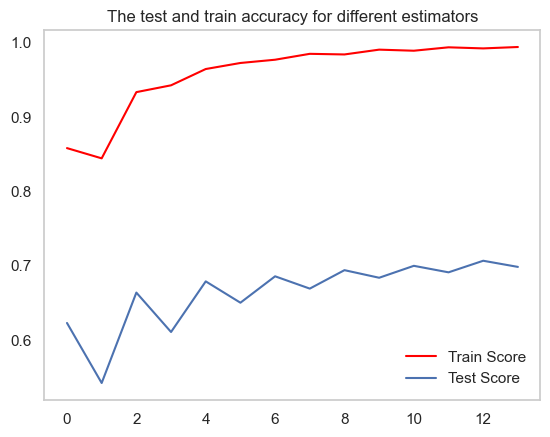

13


In [107]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [108]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [109]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_rf_Word_2_VEC = confusion_matrix(y_test, y_pred_rand)
df_cm_rf_Word_2_VEC = pd.DataFrame(con_mat_rf_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_rf_Word_2_VEC)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_rf_Word_2_VEC = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_rf_Word_2_VEC = pd.DataFrame(report_rf_Word_2_VEC).transpose()
df_Third_Approach_Random_Forest_Pipeline = df_report_rf_Word_2_VEC
display(df_report_rf_Word_2_VEC)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0          156          410
True 1          210         1279

The Classification Report for Random Forest


precision    recall  f1-score      support
-1             0.426230  0.275618  0.334764   566.000000
1              0.757253  0.858966  0.804909  1489.000000
accuracy       0.698297  0.698297  0.698297     0.698297
macro avg      0.591741  0.567292  0.569836  2055.000000
weighted avg   0.666080  0.698297  0.675419  2055.000000

#### 4.2.3.3 XGBoost

In [110]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_Word_2_VEC = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_Word_2_VEC.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_Word_2_VEC.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_Word_2_VEC.score(X_test, y_test_mapped)}")

XG Boost train score: 0.798038806592948
XG Boost test score: 0.7328467153284671


In [111]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_Word_2_VEC = confusion_matrix(y_test_mapped, XGB_model_Word_2_VEC.predict(X_test))
df_cm_xgb_Word_2_VEC = pd.DataFrame(con_mat_xgb_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_Word_2_VEC)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Word_2_VEC = classification_report(y_test_mapped, XGB_model_Word_2_VEC.predict(X_test), output_dict=True)
df_report_xgb_Word_2_VEC = pd.DataFrame(report_xgb_Word_2_VEC).transpose()
display(df_report_xgb_Word_2_VEC)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0          122          444
True 1          105         1384

The Classification report for XGBoost


precision    recall  f1-score      support
0              0.537445  0.215548  0.307692   566.000000
1              0.757112  0.929483  0.834489  1489.000000
accuracy       0.732847  0.732847  0.732847     0.732847
macro avg      0.647278  0.572515  0.571091  2055.000000
weighted avg   0.696610  0.732847  0.689396  2055.000000

In [112]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n

In [113]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_Word_2_VEC = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_Word_2_VEC.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_Word_2_VEC = XGB_model_Word_2_VEC.predict(X_test)

# Training score
train_score = XGB_model_Word_2_VEC.score(X_train, y_train_mapped)
test_score = XGB_model_Word_2_VEC.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_Word_2_VEC = confusion_matrix(y_test_mapped, y_pred_XGB_Word_2_VEC)
con_mat_XGB_Word_2_VEC = pd.DataFrame(con_mat_XGB_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_Word_2_VEC

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Word_2_VEC = classification_report(y_test_mapped, XGB_model_Word_2_VEC.predict(X_test), output_dict=True)
df_report_xgb_Word_2_VEC = pd.DataFrame(report_xgb_Word_2_VEC).transpose()
df_Third_Approach_xgb_Pipeline = df_report_xgb_Word_2_VEC
display(df_report_xgb_Word_2_VEC)

Score on training set: 1.0
Score on test set: 0.7309002433090024
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score    support
0              0.520767  0.287986  0.370876   566.0000
1              0.768657  0.899261  0.828846  1489.0000
accuracy       0.730900  0.730900  0.730900     0.7309
macro avg      0.644712  0.593624  0.599861  2055.0000
weighted avg   0.700381  0.730900  0.702709  2055.0000

#### 4.2.3.4 Naive Bayes

In [114]:
# Create and fit the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_nb = naive_bayes.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.5864802837471312
Score on test set: 0.5742092457420924


In [115]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Word_2_VEC = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Word_2_VEC = pd.DataFrame(con_mat_nb_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Word_2_VEC)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_Word_2_VEC = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Word_2_VEC = pd.DataFrame(report_nb_Word_2_VEC).transpose()
display(df_report_nb_Word_2_VEC)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0          350          216
True 1          659          830

The Classification Report for Naive Bayes


precision    recall  f1-score      support
-1             0.346878  0.618375  0.444444   566.000000
1              0.793499  0.557421  0.654832  1489.000000
accuracy       0.574209  0.574209  0.574209     0.574209
macro avg      0.570189  0.587898  0.549638  2055.000000
weighted avg   0.670488  0.574209  0.596886  2055.000000

In [116]:
# Create an estimator with the Gaussian Naive Bayes classifier
estimators = [('classifier', GaussianNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {}  

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [117]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_nb_model = fitted_search.best_estimator_
naive_bayes_Gaussian = best_nb_model.named_steps['classifier']
naive_bayes_Gaussian.fit(X_train, y_train)

# Predictions in the test set
y_pred_gaussian_nb = naive_bayes_Gaussian.predict(X_test)

# Training score
train_score_gaussian_nb = naive_bayes_Gaussian.score(X_train, y_train)
test_score_gaussian_nb = naive_bayes_Gaussian.score(X_test, y_test)

print(f"Score on training set: {train_score_gaussian_nb}")
print(f"Score on test set: {test_score_gaussian_nb}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Gaussian Naive Bayes')
con_mat_gaussian_nb = confusion_matrix(y_test, y_pred_gaussian_nb)
df_cm_gaussian_nb = pd.DataFrame(con_mat_gaussian_nb, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_gaussian_nb)

# Creation of the classification report for Gaussian Naive Bayes
print('The Classification Report for Gaussian Naive Bayes')
report_gaussian_nb = classification_report(y_test, y_pred_gaussian_nb, output_dict=True)
df_report_gaussian_nb = pd.DataFrame(report_gaussian_nb).transpose()
df_Third_Approach_NB_Pipeline = df_report_gaussian_nb
display(df_report_gaussian_nb)

Score on training set: 0.5864802837471312
Score on test set: 0.5742092457420924
The Confusion Matrix for Gaussian Naive Bayes


Predicted 0  Predicted 1
True 0          350          216
True 1          659          830

The Classification Report for Gaussian Naive Bayes


precision    recall  f1-score      support
-1             0.346878  0.618375  0.444444   566.000000
1              0.793499  0.557421  0.654832  1489.000000
accuracy       0.574209  0.574209  0.574209     0.574209
macro avg      0.570189  0.587898  0.549638  2055.000000
weighted avg   0.670488  0.574209  0.596886  2055.000000

#### 4.2.3.5 Support Vector Machine

In [118]:
# Create and fit the SVM model
svm_model_Word_2_VEC = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_Word_2_VEC.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm_Word_2_VEC = svm_model_Word_2_VEC.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_Word_2_VEC.score(X_train, y_train)
test_score_svm = svm_model_Word_2_VEC.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 0.7243897350302525
Score on test set: 0.7245742092457421


In [119]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_Word_2_VEC = confusion_matrix(y_test, y_pred_svm_Word_2_VEC)
df_cm_svm_Word_2_VEC = pd.DataFrame(con_mat_svm_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Word_2_VEC)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_Word_2_VEC = classification_report(y_test, y_pred_svm_Word_2_VEC, output_dict=True)
df_report_svm_Word_2_VEC = pd.DataFrame(report_svm_Word_2_VEC).transpose()
display(df_report_svm_Word_2_VEC)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            0          566
True 1            0         1489

The Classification Report for SVM


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score      support
-1             0.000000  0.000000  0.000000   566.000000
1              0.724574  1.000000  0.840293  1489.000000
accuracy       0.724574  0.724574  0.724574     0.724574
macro avg      0.362287  0.500000  0.420147  2055.000000
weighted avg   0.525008  0.724574  0.608855  2055.000000

In [120]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [121]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_Word_2_VEC = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_Word_2_VEC.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_Word_2_VEC.predict(X_test)

# Training score
train_score_svm = svm_model_Word_2_VEC.score(X_train, y_train)
test_score_svm = svm_model_Word_2_VEC.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_Word_2_VEC = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Word_2_VEC= pd.DataFrame(con_mat_svm_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Word_2_VEC)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_Word_2_VEC = classification_report(y_test, y_pred_svm_Word_2_VEC, output_dict=True)
df_report_svm_Word_2_VEC = pd.DataFrame(report_svm_Word_2_VEC).transpose()
df_Third_Approach_SVM_Pipeline = df_report_svm_Word_2_VEC
display(df_report_svm_Word_2_VEC)

Score on training set: 0.7243897350302525
Score on test set: 0.7245742092457421
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            0          566
True 1            0         1489

The Classification Report for SVM


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score      support
-1             0.000000  0.000000  0.000000   566.000000
1              0.724574  1.000000  0.840293  1489.000000
accuracy       0.724574  0.724574  0.724574     0.724574
macro avg      0.362287  0.500000  0.420147  2055.000000
weighted avg   0.525008  0.724574  0.608855  2055.000000

### 4.2.4 Spacy 

In [122]:
nlp = spacy.load('en_core_web_sm')

# Process your text data and store the vectors in a list
text_vectors = []
for text in df.text:
    doc = nlp(text)
    text_vector = doc.vector  # Get the vector representation for the document
    text_vectors.append(text_vector)

# Create a DataFrame from the text vectors
X_df = pd.DataFrame(text_vectors)
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4794, 96), (2055, 96), (4794,), (2055,))

#### 4.2.4.1 Logistic Regression

In [123]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_Spacy = logreg.score(X_train, y_train)
test_score_Spacy = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_Spacy}")
print(f"Score on test set: {test_score_Spacy}")

Score on training set: 0.8153942428035044
Score on test set: 0.8238442822384429


In [124]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_Spacy = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_Spacy = pd.DataFrame(con_mat_lr_Spacy, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_Spacy)
print('The Classification report for Logistic Regression')
report_Spacy = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_Spacy = pd.DataFrame(report_Spacy).transpose()
df_report_Spacy

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0          309          257
True 1          105         1384

The Classification report for Logistic Regression


precision    recall  f1-score      support
-1             0.746377  0.545936  0.630612   566.000000
1              0.843388  0.929483  0.884345  1489.000000
accuracy       0.823844  0.823844  0.823844     0.823844
macro avg      0.794882  0.737710  0.757479  2055.000000
weighted avg   0.816669  0.823844  0.814460  2055.000000

In [125]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Pipeline(steps=[('classifier', LogisticRegression(C=10, random_state=1))])

In [126]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_Spacy = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_Spacy = pd.DataFrame(con_mat_lr_final_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_Spacy)

# Creation of the ranking report
print('The Classification Report  for Logistic Regression')
report_lr_final_Spacy = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_Spacy = pd.DataFrame(report_lr_final_Spacy).transpose()
df_Fourth_Aproach_Logistic_Regression_Pipline = df_report_lr_final_Spacy
display(df_report_lr_final_Spacy)

Score on training set: 0.820191906549854
Score on test set: 0.8253041362530413
The Confusion Matrix for Logistic Regression


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted 0  Predicted 1
True 0          327          239
True 1          120         1369

The Classification Report  for Logistic Regression


precision    recall  f1-score      support
-1             0.731544  0.577739  0.645607   566.000000
1              0.851368  0.919409  0.884081  1489.000000
accuracy       0.825304  0.825304  0.825304     0.825304
macro avg      0.791456  0.748574  0.764844  2055.000000
weighted avg   0.818365  0.825304  0.818399  2055.000000

#### 4.2.4.2 Random Forest

In [127]:
my_random_forest_Spacy = RandomForestClassifier(random_state=1)
my_random_forest_Spacy.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_Spacy.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_Spacy.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.7965936739659367


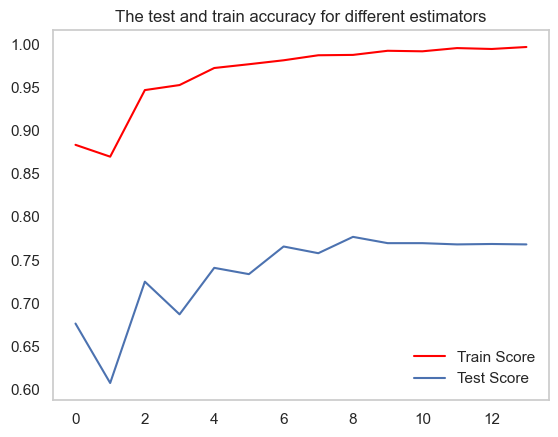

9


In [128]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [129]:
# Predicting the test set results
y_pred_rand = my_random_forest_Spacy.predict(X_test)

In [130]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_lr_Spacy = confusion_matrix(y_test, y_pred_rand)
df_cm_lr_Spacy = pd.DataFrame(con_mat_lr_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_Spacy)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_lr_Spacy = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_lr_Spacy = pd.DataFrame(report_lr_Spacy).transpose()
df_Fourth_Aproach_RF_Pipline = df_report_lr_Spacy
display(df_report_lr_Spacy)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0          217          349
True 1           69         1420

The Classification Report for Random Forest


precision    recall  f1-score      support
-1             0.758741  0.383392  0.509390   566.000000
1              0.802713  0.953660  0.871700  1489.000000
accuracy       0.796594  0.796594  0.796594     0.796594
macro avg      0.780727  0.668526  0.690545  2055.000000
weighted avg   0.790602  0.796594  0.771911  2055.000000

#### 4.2.4.3 XGBoost

In [131]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_Spacy = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_Spacy.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_Spacy.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_Spacy.score(X_test, y_test_mapped)}")

XG Boost train score: 0.8679599499374218
XG Boost test score: 0.8097323600973236


In [132]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_Spacy = confusion_matrix(y_test_mapped, XGB_model_Spacy.predict(X_test))
df_cm_xgb_Spacy = pd.DataFrame(con_mat_xgb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_Spacy)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Spacy = classification_report(y_test_mapped, XGB_model_Spacy.predict(X_test), output_dict=True)
df_report_xgb_Spacy = pd.DataFrame(report_xgb_Spacy).transpose()
display(df_report_xgb_Spacy)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0          302          264
True 1           46         1443

The Classification report for XGBoost


precision    recall  f1-score      support
0              0.733333  0.485866  0.584485   566.000000
1              0.826786  0.932841  0.876617  1489.000000
accuracy       0.809732  0.809732  0.809732     0.809732
macro avg      0.780060  0.709353  0.730551  2055.000000
weighted avg   0.801047  0.809732  0.796156  2055.000000

In [133]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_

In [134]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_Spacy = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_Spacy.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_Spacy = XGB_model_Spacy.predict(X_test)

# Training score
train_score = XGB_model_Spacy.score(X_train, y_train_mapped)
test_score = XGB_model_Spacy.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_Spacy = confusion_matrix(y_test_mapped, y_pred_XGB_Spacy)
con_mat_XGB_Spacy = pd.DataFrame(con_mat_XGB_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_Spacy

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Spacy = classification_report(y_test_mapped, XGB_model_Spacy.predict(X_test), output_dict=True)
df_report_xgb_Spacy = pd.DataFrame(report_xgb_Spacy).transpose()
df_Fourth_Aproach_xgb_Pipline = df_report_xgb_Spacy
display(df_report_xgb_Spacy)

Score on training set: 1.0
Score on test set: 0.8111922141119221
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score      support
0              0.724747  0.507067  0.596674   566.000000
1              0.831826  0.926797  0.876747  1489.000000
accuracy       0.811192  0.811192  0.811192     0.811192
macro avg      0.778287  0.716932  0.736710  2055.000000
weighted avg   0.802334  0.811192  0.799608  2055.000000

#### 4.2.4.4 Naive Bayes

In [135]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multinomial Naive Bayes model on the scaled data
# Create and fit the Naive Bayes model
naive_bayes_Spacy = MultinomialNB()
naive_bayes_Spacy.fit(X_train_scaled, y_train)

# Predicting the results of the test set
y_pred_nb = naive_bayes_Spacy.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes_Spacy.score(X_train, y_train)
test_score_NB = naive_bayes_Spacy.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.7244472256987902
Score on test set: 0.7245742092457421


In [136]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Spacy = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Spacy = pd.DataFrame(con_mat_nb_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Spacy)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_Spacy = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Spacy = pd.DataFrame(report_nb_Spacy).transpose()
display(df_report_nb_Spacy)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            0          566
True 1            0         1489

The Classification Report for Naive Bayes


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision    recall  f1-score      support
-1             0.000000  0.000000  0.000000   566.000000
1              0.724574  1.000000  0.840293  1489.000000
accuracy       0.724574  0.724574  0.724574     0.724574
macro avg      0.362287  0.500000  0.420147  2055.000000
weighted avg   0.525008  0.724574  0.608855  2055.000000

In [137]:
# Create a pipeline with scaling for grid search
estimators = [('scaler', MinMaxScaler()), ('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Preprocess data to remove negative values
X_train_non_negative = np.where(X_train < 0, 0, X_train)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data (scaled)
fitted_search = grid_search.fit(X_train_non_negative, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

# Apply Min-Max Scaling to test data before prediction
X_test_non_negative = np.where(X_test < 0, 0, X_test)
X_test_scaled = fitted_search.best_estimator_['scaler'].transform(X_test_non_negative)

# Predicting the results of the test set
y_pred_nb = best_nb_model['classifier'].predict(X_test_scaled)

# Calculate the training and test scores
train_score_NB = best_nb_model.score(X_train_non_negative, y_train)
test_score_NB = best_nb_model.score(X_test_scaled, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.7346683354192741
Score on test set: 0.7605839416058394


In [138]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']

# Preprocess data to remove negative values
X_train_non_negative = np.where(X_train < 0, 0, X_train)

naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_train_non_negative, y_train)

# Apply the same preprocessing to the test data
X_test_non_negative = np.where(X_test < 0, 0, X_test)

# Predictions in the test set
y_pred_nb = naive_bayes.predict(X_test_non_negative)

# Training score
train_score_NB = naive_bayes.score(X_train_non_negative, y_train)
test_score_NB = naive_bayes.score(X_test_non_negative, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb = confusion_matrix(y_test, y_pred_nb)
df_cm_nb = pd.DataFrame(con_mat_nb, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Spacy = pd.DataFrame(report_nb).transpose()
df_Fourth_Aproach_NB_Pipline = df_report_nb_Spacy
display(df_report_nb_Spacy)

Score on training set: 0.7284105131414268
Score on test set: 0.7289537712895378
The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0           10          556
True 1            1         1488

The Classification Report for Naive Bayes


precision    recall  f1-score      support
-1             0.909091  0.017668  0.034662   566.000000
1              0.727984  0.999328  0.842344  1489.000000
accuracy       0.728954  0.728954  0.728954     0.728954
macro avg      0.818538  0.508498  0.438503  2055.000000
weighted avg   0.777866  0.728954  0.619887  2055.000000

#### 4.2.4.5 Support Vector Machine

In [139]:
# Create and fit the SVM model
svm_model_Spacy = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_Spacy.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm = svm_model_Spacy.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_Spacy.score(X_train, y_train)
test_score_svm = svm_model_Spacy.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 0.8197747183979975
Score on test set: 0.8287104622871047


In [126]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_Spacy = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Spacy = pd.DataFrame(con_mat_svm_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Spacy)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_Spacy = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_Spacy = pd.DataFrame(report_svm_Spacy).transpose()
display(df_report_svm_Spacy)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0          867          672
True 1          331         3627

The Classification Report for SVM


precision    recall  f1-score      support
-1             0.723706  0.563353  0.633540  1539.000000
1              0.843685  0.916372  0.878527  3958.000000
accuracy       0.817537  0.817537  0.817537     0.817537
macro avg      0.783695  0.739862  0.756034  5497.000000
weighted avg   0.810094  0.817537  0.809938  5497.000000

In [140]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [141]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_Spacy = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_Spacy.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_Spacy.predict(X_test)

# Training score
train_score_svm = svm_model_Spacy.score(X_train, y_train)
test_score_svm = svm_model_Spacy.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_Spacy = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Spacy = pd.DataFrame(con_mat_svm_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Spacy)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_Spacy = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_Spacy = pd.DataFrame(report_svm_Spacy).transpose()
df_Fourth_Aproach_SVM_Pipline = df_report_svm_Spacy
display(df_report_svm_Spacy)

Score on training set: 0.8965373383395911
Score on test set: 0.8291970802919708
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0          340          226
True 1          125         1364

The Classification Report for SVM


precision    recall  f1-score      support
-1             0.731183  0.600707  0.659554   566.000000
1              0.857862  0.916051  0.886002  1489.000000
accuracy       0.829197  0.829197  0.829197     0.829197
macro avg      0.794522  0.758379  0.772778  2055.000000
weighted avg   0.822971  0.829197  0.823632  2055.000000

### 4.2.5 Custom 

In [129]:
# Vectorization
vectorizer = CountVectorizer(
    tokenizer=lambda text: text.split(), # Custom tokenizer (split by spaces)
    stop_words='english', # Remove common English words (optional)
    max_features=100 # Limit the vocabulary to the 100 most frequent words (optional)
)

# Fit the vectorizer to the text data
vectorizer.fit(df['text'])

# Transform the text data into a matrix of features
X = vectorizer.transform(df['text'])

# Create a DataFrame with the characteristics
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Define the vector of targets (sentiment)
y = df['sentiment']

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

# Check the number of occurrences of each sentiment class
y.value_counts()

# Check the dimensions of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

c:\Users\pport\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((12824, 100), (5497, 100), (12824,), (5497,))

#### 4.2.5.1 Logistic Regression

In [ ]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_Custom = logreg.score(X_train, y_train)
test_score_Custom = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_Custom}")
print(f"Score on test set: {test_score_Custom}")

Score on training set: 0.9846153846153847
Score on test set: 0.7142857142857143


In [ ]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_Custom = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_Custom = pd.DataFrame(con_mat_lr_Custom, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_Custom)
print('The Classification report for Logistic Regression')
report_Custom = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_Custom = pd.DataFrame(report_Custom).transpose()
df_report_Custom

The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            4            5
True 1            3           16

The Classification report for Logistic Regression


precision    recall  f1-score    support
-1             0.571429  0.444444  0.500000   9.000000
1              0.761905  0.842105  0.800000  19.000000
accuracy       0.714286  0.714286  0.714286   0.714286
macro avg      0.666667  0.643275  0.650000  28.000000
weighted avg   0.700680  0.714286  0.703571  28.000000

In [ ]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=1, random_state=1))])

In [ ]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_Custom = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_Custom = pd.DataFrame(con_mat_lr_final_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_Custom)

# Creation of the ranking report
print('The Classification Report  for Logistic Regression')
report_lr_final_Custom = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_Custom = pd.DataFrame(report_lr_final_Custom).transpose()
df_Fifth_Aproach_LR_Pipeline = df_report_lr_final_Custom
display(df_report_lr_final_Custom)

Score on training set: 1.0
Score on test set: 0.6785714285714286
The Confusion Matrix for Logistic Regression


Predicted 0  Predicted 1
True 0            5            4
True 1            5           14

The Classification Report  for Logistic Regression


precision    recall  f1-score    support
-1             0.500000  0.555556  0.526316   9.000000
1              0.777778  0.736842  0.756757  19.000000
accuracy       0.678571  0.678571  0.678571   0.678571
macro avg      0.638889  0.646199  0.641536  28.000000
weighted avg   0.688492  0.678571  0.682686  28.000000

####  4.2.5.2  Random Forest

In [ ]:
my_random_forest_Custom = RandomForestClassifier(random_state=1)
my_random_forest_Custom.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_Custom.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_Custom.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.7857142857142857


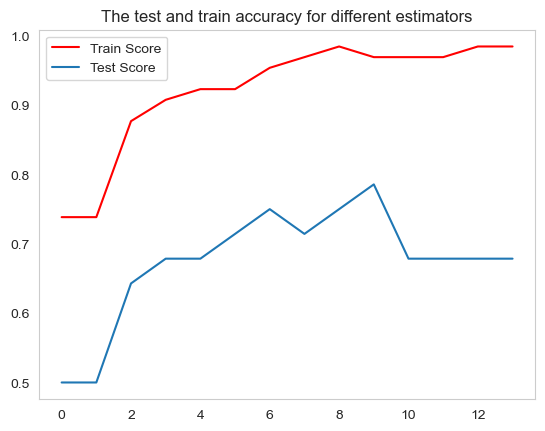

10


In [ ]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [ ]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [ ]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_rf_Custom = confusion_matrix(y_test, y_pred_rand)
df_cm_rf_Custom = pd.DataFrame(con_mat_rf_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_rf_Custom)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_rf_Custom = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_rf_Custom = pd.DataFrame(report_rf_Custom).transpose()
df_Fifth_Aproach_RF_Pipeline = df_report_rf_Custom
display(df_report_rf_Custom)

The Confusion Matrix for Random Forest


Predicted 0  Predicted 1
True 0            3            6
True 1            3           16

The Classification Report for Random Forest


precision    recall  f1-score    support
-1             0.500000  0.333333  0.400000   9.000000
1              0.727273  0.842105  0.780488  19.000000
accuracy       0.678571  0.678571  0.678571   0.678571
macro avg      0.613636  0.587719  0.590244  28.000000
weighted avg   0.654221  0.678571  0.658188  28.000000

####  4.2.5.3  XGBoost

In [ ]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_Custom = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_Custom.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_Custom.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_Custom.score(X_test, y_test_mapped)}")

XG Boost train score: 0.9538461538461539
XG Boost test score: 0.6428571428571429


In [ ]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_Custom = confusion_matrix(y_test_mapped, XGB_model_Custom.predict(X_test))
df_cm_xgb_Custom = pd.DataFrame(con_mat_xgb_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_Custom)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Custom = classification_report(y_test_mapped, XGB_model_Custom.predict(X_test), output_dict=True)
df_report_xgb_Custom = pd.DataFrame(report_xgb_Custom).transpose()
display(df_report_xgb_Custom)

The Confusion Matrix for XGBoost


Predicted 0  Predicted 1
True 0            3            6
True 1            4           15

The Classification report for XGBoost


precision    recall  f1-score    support
0              0.428571  0.333333  0.375000   9.000000
1              0.714286  0.789474  0.750000  19.000000
accuracy       0.642857  0.642857  0.642857   0.642857
macro avg      0.571429  0.561404  0.562500  28.000000
weighted avg   0.622449  0.642857  0.629464  28.000000

In [ ]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=300, 

In [ ]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_Custom = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_Custom.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_Custom = XGB_model_Custom.predict(X_test)

# Training score
train_score = XGB_model_Custom.score(X_train, y_train_mapped)
test_score = XGB_model_Custom.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_Custom = confusion_matrix(y_test_mapped, y_pred_XGB_Custom)
con_mat_XGB_Custom = pd.DataFrame(con_mat_XGB_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_Custom

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Custom = classification_report(y_test_mapped, XGB_model_Custom.predict(X_test), output_dict=True)
df_report_xgb_Custom = pd.DataFrame(report_xgb_Custom).transpose()
df_Fifth_Aproach_xgb_Pipeline = df_report_xgb_Custom
display(df_report_xgb_Custom)

Score on training set: 0.9846153846153847
Score on test set: 0.6428571428571429
The Confusion Matrix for XGBoost
The Classification report for XGBoost


precision    recall  f1-score    support
0              0.444444  0.444444  0.444444   9.000000
1              0.736842  0.736842  0.736842  19.000000
accuracy       0.642857  0.642857  0.642857   0.642857
macro avg      0.590643  0.590643  0.590643  28.000000
weighted avg   0.642857  0.642857  0.642857  28.000000

In [ ]:
# Replace -1 with 0 in the sentiment column
df['sentiment'] = df['sentiment'].replace(-1, 0)

# Define the vector of targets (sentiment)
y = df['sentiment']

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

####  4.2.5.4  Naive Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multinomial Naive Bayes model on the scaled data
# Create and fit the Naive Bayes model
naive_bayes_Custom = MultinomialNB()
naive_bayes_Custom.fit(X_train_scaled, y_train)

# Predicting the results of the test set
y_pred_nb = naive_bayes_Custom.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes_Custom.score(X_train, y_train)
test_score_NB = naive_bayes_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.8615384615384616
Score on test set: 0.7857142857142857


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [ ]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Custom = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Custom = pd.DataFrame(con_mat_nb_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Custom)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_Custom = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Custom = pd.DataFrame(report_nb_Custom).transpose()
display(df_report_nb_Custom)

The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            5            4
True 1            2           17

The Classification Report for Naive Bayes


precision    recall  f1-score    support
0              0.714286  0.555556  0.625000   9.000000
1              0.809524  0.894737  0.850000  19.000000
accuracy       0.785714  0.785714  0.785714   0.785714
macro avg      0.761905  0.725146  0.737500  28.000000
weighted avg   0.778912  0.785714  0.777679  28.000000

In [ ]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [ ]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes_Custom = MultinomialNB(alpha=best_alpha)
naive_bayes_Custom.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes_Custom.predict(X_test)

# Training score
train_score_NB = naive_bayes_Custom.score(X_train, y_train)
test_score_NB = naive_bayes_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Custom = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Custom = pd.DataFrame(con_mat_nb_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Custom)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_Custom = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Custom = pd.DataFrame(report_nb_Custom).transpose()
df_Fifth_Aproach_NB_Pipeline = df_report_nb_Custom
display(df_report_nb_Custom)

Score on training set: 0.8769230769230769
Score on test set: 0.7857142857142857
The Confusion Matrix for Naive Bayes


Predicted 0  Predicted 1
True 0            4            5
True 1            1           18

The Classification Report for Naive Bayes


precision    recall  f1-score    support
0              0.800000  0.444444  0.571429   9.000000
1              0.782609  0.947368  0.857143  19.000000
accuracy       0.785714  0.785714  0.785714   0.785714
macro avg      0.791304  0.695906  0.714286  28.000000
weighted avg   0.788199  0.785714  0.765306  28.000000

####  4.2.5.5 Support Vector Machine

In [ ]:
# Replace back 0 with -1 in the sentiment column
df['sentiment'] = df['sentiment'].replace(0, -1)

# Define the vector of targets (sentiment)
y = df['sentiment']

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Create and fit the SVM model
svm_model_Custom = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_Custom.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm_Custom = svm_model_Custom.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_Custom.score(X_train, y_train)
test_score_svm = svm_model_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 1.0
Score on test set: 0.5714285714285714


In [ ]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_Custom = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Custom = pd.DataFrame(con_mat_svm_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Custom)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_Custom = classification_report(y_test, y_pred_svm_Custom, output_dict=True)
df_report_svm_Custom = pd.DataFrame(report_svm_Custom).transpose()
display(df_report_svm_Custom)

The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            0            9
True 1            0           19

The Classification Report for SVM


precision    recall  f1-score    support
-1             0.363636  0.444444  0.400000   9.000000
1              0.705882  0.631579  0.666667  19.000000
accuracy       0.571429  0.571429  0.571429   0.571429
macro avg      0.534759  0.538012  0.533333  28.000000
weighted avg   0.595875  0.571429  0.580952  28.000000

In [ ]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [ ]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_Custom = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_Custom.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_Custom.predict(X_test)

# Training score
train_score_svm = svm_model_Custom.score(X_train, y_train)
test_score_svm = svm_model_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_Custom = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Custom = pd.DataFrame(con_mat_svm_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Custom)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_Custom = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_Custom = pd.DataFrame(report_svm_Custom).transpose()
df_Fifth_Aproach_SVM_Pipeline = df_report_svm_Custom
display(df_report_svm_Custom)

Score on training set: 0.9076923076923077
Score on test set: 0.6428571428571429
The Confusion Matrix for SVM


Predicted 0  Predicted 1
True 0            2            7
True 1            3           16

The Classification Report for SVM


precision    recall  f1-score    support
-1             0.400000  0.222222  0.285714   9.000000
1              0.695652  0.842105  0.761905  19.000000
accuracy       0.642857  0.642857  0.642857   0.642857
macro avg      0.547826  0.532164  0.523810  28.000000
weighted avg   0.600621  0.642857  0.608844  28.000000

# Results table

In [142]:
data = [
    ["", "", "", "", ""],
    ["", "Precision", "Recall", "F1-Score", "Support"],
    ["Logistic Regression (CountVectorizer)", df_First_Approach_Logistics_Regression_Pipeline['precision'][1], df_First_Approach_Logistics_Regression_Pipeline['recall'][1],
     df_First_Approach_Logistics_Regression_Pipeline['f1-score'][1],df_First_Approach_Logistics_Regression_Pipeline['support'][1] ],
     ["Random Forest (CountVectorizer)", df_First_Approach_Random_Forest_Pipeline['precision'][1], df_First_Approach_Random_Forest_Pipeline['recall'][1],
     df_First_Approach_Random_Forest_Pipeline['f1-score'][1],df_First_Approach_Random_Forest_Pipeline['support'][1] ],
     ["XGBoost (CountVectorizer)", df_First_Approach_XGBoost_Pipeline['precision'][1], df_First_Approach_XGBoost_Pipeline['recall'][1],
     df_First_Approach_XGBoost_Pipeline['f1-score'][1],df_First_Approach_XGBoost_Pipeline['support'][1] ],
     ["Naive Bayes (CountVectorizer)", df_First_Approach_Naive_Bayes_Pipeline['precision'][1], df_First_Approach_Naive_Bayes_Pipeline['recall'][1],
     df_First_Approach_Naive_Bayes_Pipeline['f1-score'][1],df_First_Approach_Naive_Bayes_Pipeline['support'][1] ],
     ["SVM (CountVectorizer)", df_First_Approach_SVM_Pipeline['precision'][1], df_First_Approach_SVM_Pipeline['recall'][1],
     df_First_Approach_SVM_Pipeline['f1-score'][1],df_First_Approach_SVM_Pipeline['support'][1] ],

     ["Logistic Regression (Tf-IDF)", df_Second_Approach_Logistic_Regression_Pipeline['precision'][1], df_Second_Approach_Logistic_Regression_Pipeline['recall'][1],
     df_Second_Approach_Logistic_Regression_Pipeline['f1-score'][1],df_Second_Approach_Logistic_Regression_Pipeline['support'][1] ],
     ["Random Forest (Tf-IDF)", df_Second_Approach_Random_Forest_Pipeline['precision'][1], df_Second_Approach_Random_Forest_Pipeline['recall'][1],
     df_Second_Approach_Random_Forest_Pipeline['f1-score'][1],df_Second_Approach_xgb_Pipeline['support'][1] ],
     ["XGBoost (Tf-IDF)", df_Second_Approach_xgb_Pipeline['precision'][1], df_First_Approach_XGBoost_Pipeline['recall'][1],
     df_Second_Approach_xgb_Pipeline['f1-score'][1],df_Second_Approach_xgb_Pipeline['support'][1] ],
     ["Naive Bayes (Tf-IDF)", df_Second_Approach_NB_Pipeline['precision'][1], df_Second_Approach_NB_Pipeline['recall'][1],
     df_Second_Approach_NB_Pipeline['f1-score'][1],df_Second_Approach_NB_Pipeline['support'][1] ],
     ["SVM (Tf-IDF)", df_Second_Approach_SVM_Pipeline['precision'][1], df_Second_Approach_SVM_Pipeline['recall'][1],
     df_Second_Approach_SVM_Pipeline['f1-score'][1],df_Second_Approach_SVM_Pipeline['support'][1] ],

     ["Logistic Regression (Word2Vec)", df_Third_Approach_Logistic_Regression_Pipeline['precision'][1], df_Third_Approach_Logistic_Regression_Pipeline['recall'][1],
     df_Third_Approach_Logistic_Regression_Pipeline['f1-score'][1],df_Third_Approach_Logistic_Regression_Pipeline['support'][1] ],
     ["Random Forest (Word2Vec)", df_Third_Approach_Random_Forest_Pipeline['precision'][1], df_Third_Approach_Random_Forest_Pipeline['recall'][1],
     df_Third_Approach_Random_Forest_Pipeline['f1-score'][1],df_Third_Approach_Random_Forest_Pipeline['support'][1] ],
     ["XGBoost (Word2Vec)", df_Third_Approach_xgb_Pipeline['precision'][1], df_Third_Approach_xgb_Pipeline['recall'][1],
     df_Third_Approach_xgb_Pipeline['f1-score'][1],df_Third_Approach_xgb_Pipeline['support'][1] ],
     ["Naive Bayes (Word2Vec)", df_Third_Approach_NB_Pipeline['precision'][1], df_Third_Approach_NB_Pipeline['recall'][1],
     df_Third_Approach_NB_Pipeline['f1-score'][1],df_Third_Approach_NB_Pipeline['support'][1] ],
     ["SVM (Word2Vec)", df_Third_Approach_SVM_Pipeline['precision'][1], df_Third_Approach_SVM_Pipeline['recall'][1],
     df_Third_Approach_SVM_Pipeline['f1-score'][1],df_Third_Approach_SVM_Pipeline['support'][1] ],

     ["Logistic Regression (Spacy)", df_Fourth_Aproach_Logistic_Regression_Pipline['precision'][1], df_Fourth_Aproach_Logistic_Regression_Pipline['recall'][1],
     df_Fourth_Aproach_Logistic_Regression_Pipline['f1-score'][1],df_Fourth_Aproach_Logistic_Regression_Pipline['support'][1] ],
     ["Random Forest (Spacy)", df_Fourth_Aproach_RF_Pipline['precision'][1], df_Fourth_Aproach_RF_Pipline['recall'][1],
     df_Fourth_Aproach_RF_Pipline['f1-score'][1],df_Fourth_Aproach_RF_Pipline['support'][1] ],
     ["XGBoost (Spacy)", df_Fourth_Aproach_xgb_Pipline['precision'][1], df_Fourth_Aproach_xgb_Pipline['recall'][1],
     df_Fourth_Aproach_xgb_Pipline['f1-score'][1],df_Fourth_Aproach_xgb_Pipline['support'][1] ],
     ["Naive Bayes (Spacy)", df_Fourth_Aproach_NB_Pipline['precision'][1], df_Fourth_Aproach_NB_Pipline['recall'][1],
     df_Fourth_Aproach_NB_Pipline['f1-score'][1],df_Fourth_Aproach_NB_Pipline['support'][1] ],
     ["SVM (Spacy)", df_Fourth_Aproach_SVM_Pipline['precision'][1], df_Fourth_Aproach_SVM_Pipline['recall'][1],
     df_Fourth_Aproach_SVM_Pipline['f1-score'][1],df_Fourth_Aproach_SVM_Pipline['support'][1] ],

 
    
]

# Organize data by model
data_reordered = utils.group_rows_by_model(data)
# Print the rearranged table
table = tabulate(data_reordered, headers="firstrow", tablefmt="fancy_grid")
print(table)

╒═══════════════════════════════════════╤════════════════════╤════════════════════╤════════════════════╤═════════╕
│                                       │                    │                    │                    │         │
╞═══════════════════════════════════════╪════════════════════╪════════════════════╪════════════════════╪═════════╡
│                                       │ Precision          │ Recall             │ F1-Score           │ Support │
├───────────────────────────────────────┼────────────────────┼────────────────────┼────────────────────┼─────────┤
│ Logistic Regression (CountVectorizer) │ 0.9030779305828421 │ 0.926124916051041  │ 0.9144562334217508 │ 1489.0  │
├───────────────────────────────────────┼────────────────────┼────────────────────┼────────────────────┼─────────┤
│ Logistic Regression (Tf-IDF)          │ 0.9108781127129751 │ 0.9335124244459369 │ 0.9220563847429518 │ 1489.0  │
├───────────────────────────────────────┼────────────────────┼──────────────────

In [146]:
"""
# Example of dummy data
models = [
    "Logistic Regression",
    "Random Forest",
    "XGBoost",
    "Naïve Bayes",
    "SVM"
]

approaches = [
    "CountVectorizer",
    "Tf-IDF",
    "Word2Vec",
    "Spacy",
]

metrics = ["Precision", "Recall", "F1-Score"]

# Generate dummy data for performance metrics (replace with your real data)
data = data

# Define different shades of blue
colors = ['#063970', '#1e81b0', '#76b5c5', '#0c6399', '#dfe6e9']

# Increase the size of graphics
plt.figure(figsize=(20, 8))

# Stacked Bar Chart
for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i + 1)
    bottom = np.zeros(len(models))
    for j, approach in enumerate(approaches):
        plt.bar(models, data[:, j, i], label=approach, bottom=bottom, color=colors[j]) # Set color to different shades of blue
        bottom += data[:, j, i]
    plt.title(metric)
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.xticks(rotation=45) # Rotate x-axis labels by 45 degrees
    plt.legend(loc='upper right')

# Remove grids
for ax in plt.gcf().get_axes():
    ax.grid(False)

# Set background to white
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.show()

# Grouped Bar Chart
plt.figure(figsize=(20, 8))
bar_width = 0.2
for i, approach in enumerate(approaches):
    plt.subplot(1, len(approaches), i + 1)
    width = 0.2
    for j, metric in enumerate(metrics):
        x = np.arange(len(models))
        plt.bar(x + j * width, data[:, i, j], width, label=metric, color=colors[j]) # Set color to different shades of blue
    plt.title(approach, fontsize=16, fontweight='bold')
    plt.xlabel("Models", fontweight='bold')
    plt.ylabel("Scores",  fontweight='bold')
    plt.xticks(x + width * len(metrics) / 2, models, rotation=45) # Rotate x-axis labels by 45 degrees
    plt.legend(metrics, loc='upper right')

# Remove grids
for ax in plt.gcf().get_axes():
    ax.grid(False)

# Set background to white
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.show()

# Line Chart
plt.figure(figsize=(20, 8))
for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i + 1)
    for j, model in enumerate(models):
        plt.plot(approaches, data[j, :, i], marker='o', label=f"{model} ({metric})", color=colors[j]) # Set color to different shades of blue
    plt.title(f"{metric} Comparison")
    plt.xlabel("Approaches")
    plt.ylabel(metric)
    plt.xticks(rotation=45) # Rotate x-axis labels by 45 degrees
    plt.legend(loc='upper right')

# Remove grids
for ax in plt.gcf().get_axes():
    ax.grid(False)

# Set background to white
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.show()          """

'\n# Example of dummy data\nmodels = [\n    "Logistic Regression",\n    "Random Forest",\n    "XGBoost",\n    "Naïve Bayes",\n    "SVM"\n]\n\napproaches = [\n    "CountVectorizer",\n    "Tf-IDF",\n    "Word2Vec",\n    "Spacy",\n]\n\nmetrics = ["Precision", "Recall", "F1-Score"]\n\n# Generate dummy data for performance metrics (replace with your real data)\ndata = data\n\n# Define different shades of blue\ncolors = [\'#063970\', \'#1e81b0\', \'#76b5c5\', \'#0c6399\', \'#dfe6e9\']\n\n# Increase the size of graphics\nplt.figure(figsize=(20, 8))\n\n# Stacked Bar Chart\nfor i, metric in enumerate(metrics):\n    plt.subplot(1, len(metrics), i + 1)\n    bottom = np.zeros(len(models))\n    for j, approach in enumerate(approaches):\n        plt.bar(models, data[:, j, i], label=approach, bottom=bottom, color=colors[j]) # Set color to different shades of blue\n        bottom += data[:, j, i]\n    plt.title(metric)\n    plt.xlabel("Models")\n    plt.ylabel(metric)\n    plt.xticks(rotation=45) # Ro

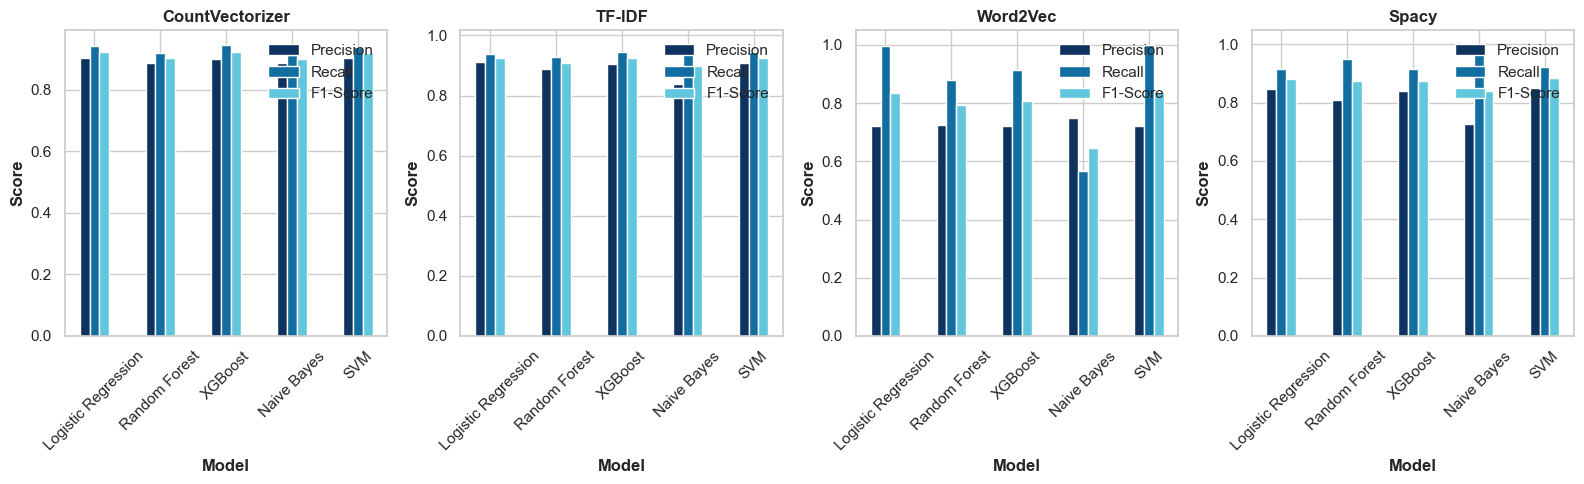

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Defina os nomes dos modelos e dos vetores de características
model_names = ["Logistic Regression", "Random Forest", "XGBoost", "Naive Bayes", "SVM"]
vectorizers = ["CountVectorizer", "TF-IDF", "Word2Vec", "Spacy"]

# Set precision, recall and F1-Score values ​​for each model and feature vector combination
precision_values = [
    [0.901979719942057, 0.8883199219702511, 0.9002163981726377, 0.8861629048086359, 0.9029126213592233],
    [0.9107405590975969, 0.88717081420633, 0.9050157499394234, 0.8396495071193867, 0.9067961165048544],
    [0.7198905109489051, 0.7258671124111993, 0.7214356929212363, 0.7493324432576769, 0.7199781659388647],
    [0.8471799672361339, 0.8087443463278053, 0.8383510884668828, 0.7260525831954403, 0.8516355140186916]
]

recall_values = [
    [0.943911066195048, 0.9204143506821627, 0.9459322890348661, 0.9125821121778676, 0.9398686205154119],
    [0.9383527033855482, 0.9277412834765033, 0.9459322890348661, 0.9684183931278424, 0.943911066195048],
    [0.9969673995451099, 0.8779378316906747, 0.9143290371493555, 0.5673490017690169, 1.0],
    [0.9146033350176856, 0.948711470439616, 0.9146033350176856, 0.9977261243052047, 0.9209196563921173]
]

f1_score_values = [
    [0.9224691358024691, 0.9040823923563718, 0.9225083158802514, 0.8991784914115011, 0.921020054468928],
    [0.9243404678944749, 0.9070025935531678, 0.9239332096474955, 0.899448550979702, 0.9249814310472889],
    [0.8360707852071634, 0.7946928971748827, 0.8065091395452518, 0.6457644182367324, 0.8371945414154237],
    [0.8796015064998177, 0.8731542843855365, 0.8748187530207829, 0.8404810045759286, 0.8849235251274582]
]

# Blue colors for bars
colors = ['#0e335f', '#126ea1', '#62c6dd']

# Configure the width of the bars
bar_width = 0.15 # Reduces the width of the bars

# Set the position of the bars on the x-axis
x = np.arange(len(model_names))

# Create a figure with four subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))  # Reduce the width of the figure
for i, vectorizer in enumerate(vectorizers):
    ax = axes[i]
    
    ax.bar(x - bar_width, precision_values[i], width=bar_width, label='Precision', align='center', color=colors[0])
    ax.bar(x, recall_values[i], width=bar_width, label='Recall', align='center', color=colors[1])
    ax.bar(x + bar_width, f1_score_values[i], width=bar_width, label='F1-Score', align='center', color=colors[2])
    
    ax.set_xlabel('Model', fontweight='bold')
    ax.set_ylabel('Score', fontweight='bold')
    ax.set_title(f'{vectorizer}', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45)  # Rotaciona os rótulos em 45 graus
    ax.legend(loc='upper right')  # Move a legenda para a parte superior direita

# Adjust the arrangement of subplots and show the figure
plt.tight_layout()
plt.show()


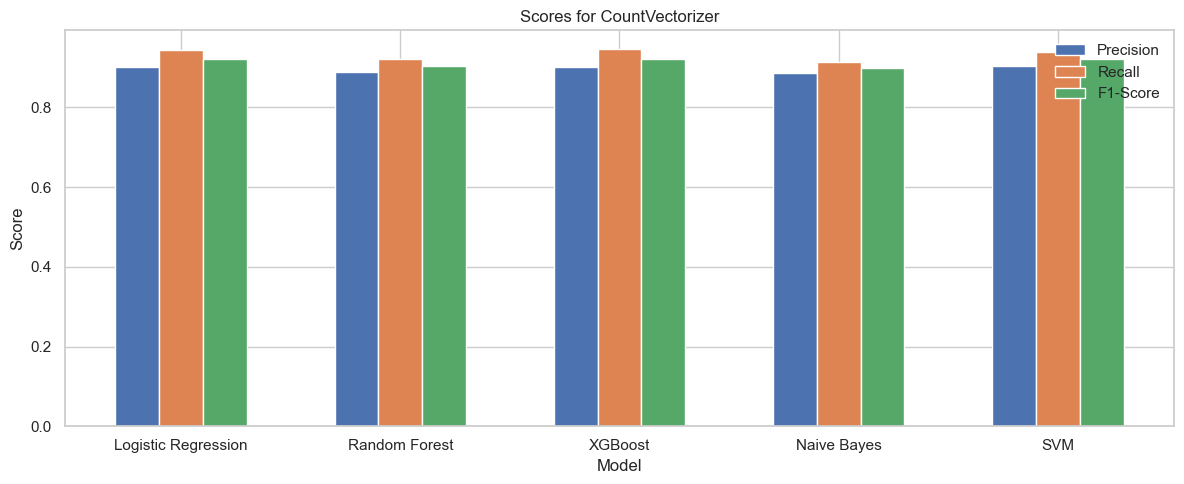

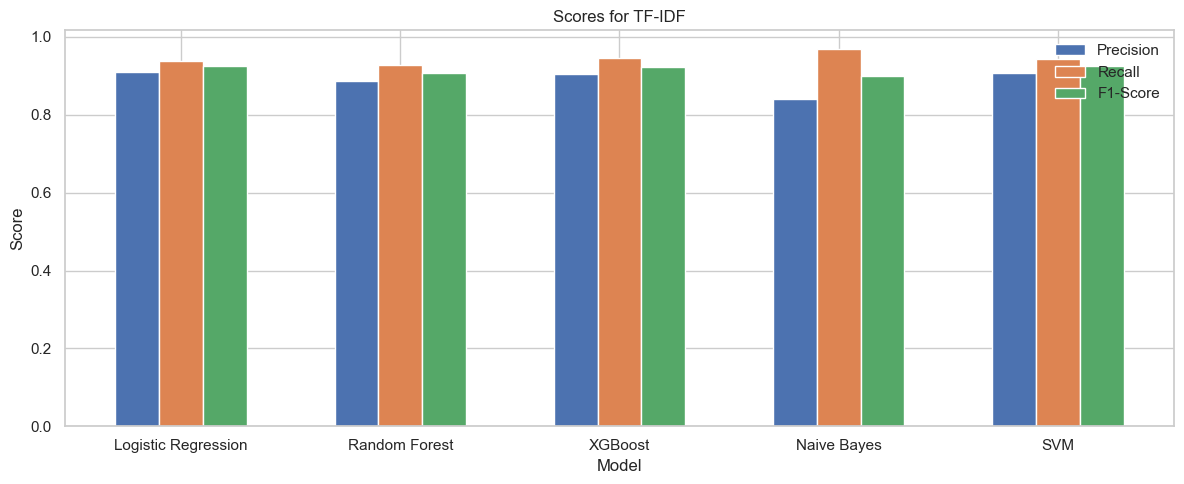

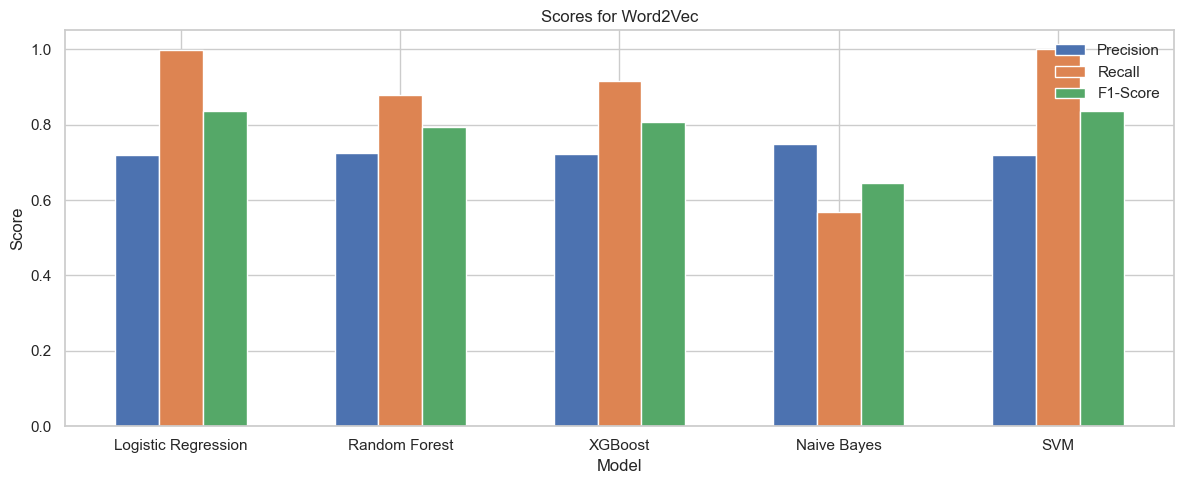

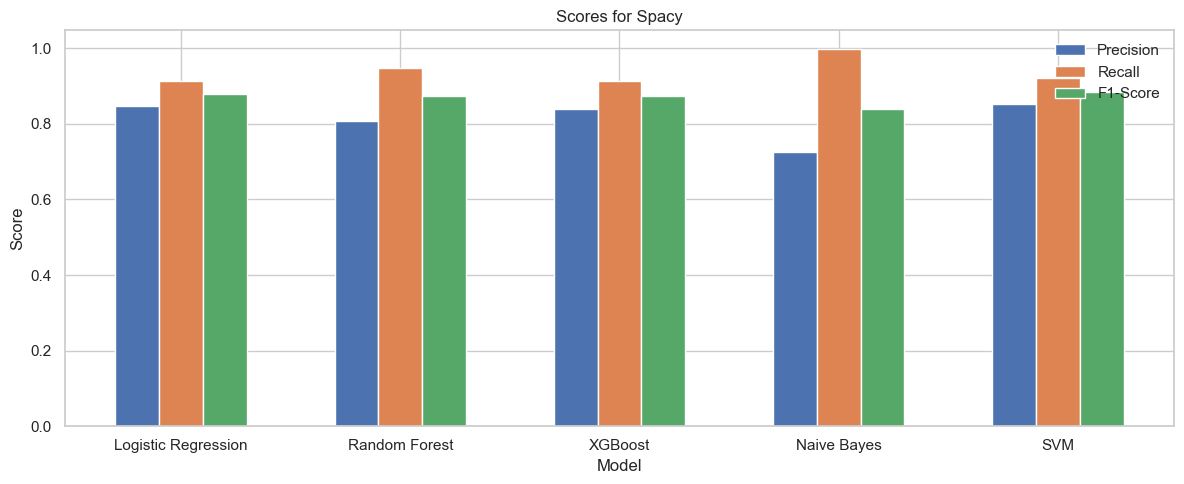

In [145]:
# Define model and feature vector names
model_names = ["Logistic Regression", "Random Forest", "XGBoost", "Naive Bayes", "SVM"]
vectorizers = ["CountVectorizer", "TF-IDF", "Word2Vec", "Spacy"]

# Set precision, recall and F1-Score values ​​for each model and feature vector combination
precision_values = [
    [0.901979719942057, 0.8883199219702511, 0.9002163981726377, 0.8861629048086359, 0.9029126213592233],
    [0.9107405590975969, 0.88717081420633, 0.9050157499394234, 0.8396495071193867, 0.9067961165048544],
    [0.7198905109489051, 0.7258671124111993, 0.7214356929212363, 0.7493324432576769, 0.7199781659388647],
    [0.8471799672361339, 0.8087443463278053, 0.8383510884668828, 0.7260525831954403, 0.8516355140186916]
]

recall_values = [
    [0.943911066195048, 0.9204143506821627, 0.9459322890348661, 0.9125821121778676, 0.9398686205154119],
    [0.9383527033855482, 0.9277412834765033, 0.9459322890348661, 0.9684183931278424, 0.943911066195048],
    [0.9969673995451099, 0.8779378316906747, 0.9143290371493555, 0.5673490017690169, 1.0],
    [0.9146033350176856, 0.948711470439616, 0.9146033350176856, 0.9977261243052047, 0.9209196563921173]
]

f1_score_values = [
    [0.9224691358024691, 0.9040823923563718, 0.9225083158802514, 0.8991784914115011, 0.921020054468928],
    [0.9243404678944749, 0.9070025935531678, 0.9239332096474955, 0.899448550979702, 0.9249814310472889],
    [0.8360707852071634, 0.7946928971748827, 0.8065091395452518, 0.6457644182367324, 0.8371945414154237],
    [0.8796015064998177, 0.8731542843855365, 0.8748187530207829, 0.8404810045759286, 0.8849235251274582]
]

# Configure the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
x = np.arange(len(model_names))

# Create separate bar charts for each feature vector
for i, vectorizer in enumerate(vectorizers):
    plt.figure(figsize=(12, 5))
    plt.bar(x - bar_width, precision_values[i], width=bar_width, label='Precision', align='center')
    plt.bar(x, recall_values[i], width=bar_width, label='Recall', align='center')
    plt.bar(x + bar_width, f1_score_values[i], width=bar_width, label='F1-Score', align='center')
    
    # Configure labels and title
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title(f'Scores for {vectorizer}')
    plt.xticks(x, model_names)
    plt.legend()
    
    # Show the graph
    plt.tight_layout()
    plt.show()
